# Cardiotocographic

Objective:

The main goal of this assignment is to conduct a thorough exploratory analysis of the "cardiographic.csv" dataset to uncover insights, identify patterns, and understand the dataset's underlying structure. You will use statistical summaries, visualizations, and data manipulation techniques to explore the dataset comprehensively.

In [31]:
#Loading the dataset into a DataFrame or equivalent data structure.
import numpy as np
import pandas as pd 
import seaborn as sb
import matplotlib.pyplot as plt
from scipy.stats import t
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('../Datasets/Cardiotocographic.csv')
df

LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   64.0  0.999926  2.000000  
1      2.1   0.000000  10.4  130.0  0.000000  1.000000  
2      2.1   0.000000  13.4  130.0  0.000000  1.000000  
3      2.4   0.000000  23.0  117.0  1.000000  1.000000  
4      2.4   0.000000  19.9  117.0  1.000000  1.000000  
...    ...        ...   ...    ...       ...       ...  
2121   0.2  25.000000   7.2   40.0  0.000000  2.000000  
2122   0.4  22.000000   7.1   66.0  1.000000  2.000000  
2123   0.4  20.000000   6.1   67.0  1.000000  1.990464  
2124   0.4  27.000000   7.0   66.0  1.000000  2.000000  
2125   0.4  35.857183   5.0   42.0  0.000000  1.000000  

[2126 rows x 14 columns]

In [3]:
#Identifing and correcting inconsistencies in Datatypes (e.g., numerical values stored as strings).
df.dtypes

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object

In [4]:
df.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2106.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.270154     0.004391     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001634     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000142     0.000840    18.813973     1.173632    21.205041   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [56]:
df.LB.unique().shape[0]

154

In [5]:
#Handle missing values appropriately (e.g., imputation, deletion).
df.isnull().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

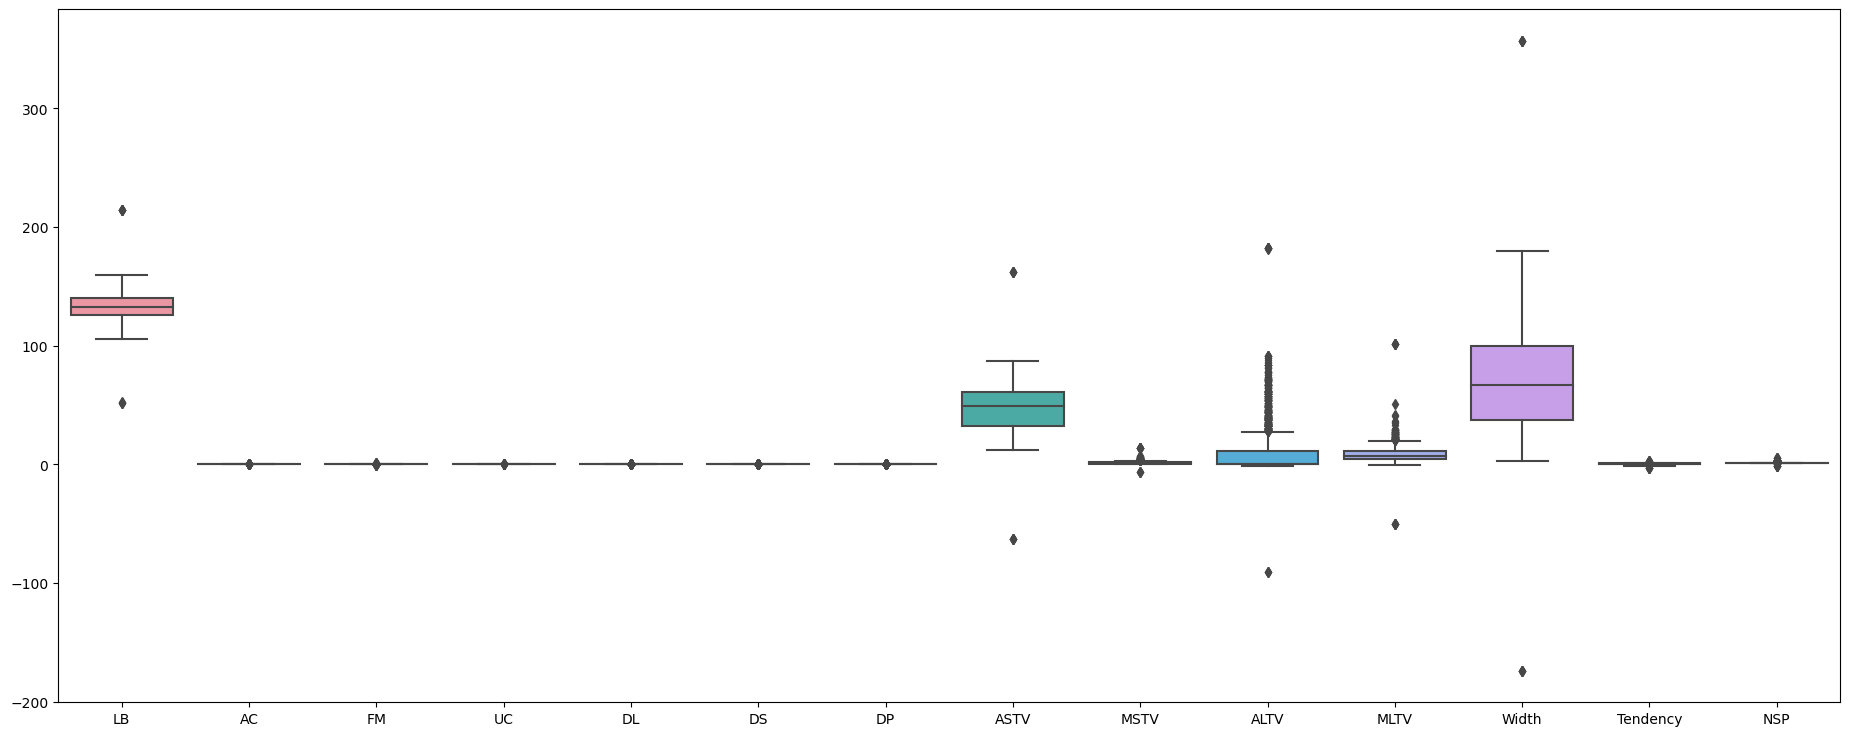

In [47]:
#Detected and treat outliers.
plt.figure(figsize=[23,9])
sb.boxplot(df)
plt.show()

abs
It is a technique where we find out which data points is extended from its range 

z_scores= np.abs((df-df.mean())/df.std())

df [z_scores > outlier_treshould]= np.nan

abs score  tells us the z_score of live data 

In [ ]:
#make a report and state what  numeric parmeter says 
#data visua

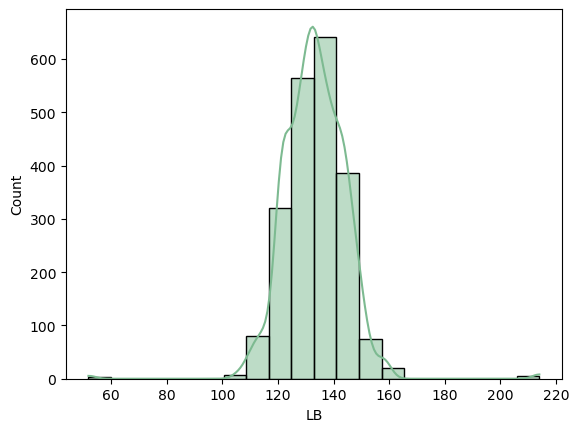

In [62]:
sb.histplot(df.LB,bins=20,kde=True)
plt.show()

In [60]:
df.LB

0       120.000000
1       132.000000
2       133.000000
3       134.000000
4       131.948232
           ...    
2121    140.000000
2122    140.000000
2123    140.000000
2124    140.000000
2125    142.000000
Name: LB, Length: 2126, dtype: float64

In [48]:
#showing the Min-Max Range 
print(df.columns.unique())
mm=input('Enter a column for getting a range of Minimum & Maximum ')
print(mm, "Minimum:" , df[mm].min() , "\t" , "Maximum:" , df[mm].max())

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
Enter a column for getting a range of Minimum & Maximum LB
LB Minimum: 51.84248683343552 	 Maximum: 214.0


In [50]:
#Provide a statistical summary for each variable in the dataset, including measures of central tendency (mean, median) and dispersion (standard deviation, interquartile range).

# Interquartile Range of each Parameter
print(df.columns.unique())
aa=input('Enter A Column for IQR  ')
q1=np.percentile(df[aa],25)
q3=np.percentile(df[aa],75)
iqr=q3-q1
iqr

Index(['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'ASTV', 'MSTV', 'ALTV',
       'MLTV', 'Width', 'Tendency', 'NSP'],
      dtype='object')
Enter A Column for IQR  MSTV


1.0

In [9]:
i="ALTV"
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)
iqr=q3-q1
c1=q3+(1.5*iqr)
c2=q1-(1.5*iqr)
altv=df[(df[i]<=c2) | (df[i]>=c1)]
altv

LB        AC        FM        UC        DL   DS   DP  ASTV      MSTV  \
0     120.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0  0.500000   
24    128.0  0.000000  0.000000  0.003311  0.000091  0.0  0.0  86.0  0.305801   
25    124.0  0.000000  0.000000  0.000000 -0.000035  0.0  0.0  86.0  0.300000   
27    124.0  0.000000  0.000000  0.000000  0.000000  0.0  0.0  87.0  0.200000   
53    150.0  0.000000  0.000834  0.000000  0.000834  0.0  0.0  61.0  0.500000   
...     ...       ...       ...       ...       ...  ...  ...   ...       ...   
2106  136.0  0.000000  0.001096  0.007675  0.000000  0.0  0.0  78.0  0.400000   
2114  137.0  0.000000  0.000000  0.007009  0.000000  0.0  0.0  81.0  0.359472   
2115  140.0  0.000021  0.000000  0.006424  0.000000  0.0  0.0  83.0  0.200000   
2116  140.0  0.003968  0.000000  0.003968  0.000000  0.0  0.0  80.0  0.200000   
2125  142.0  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0  0.400000   

           ALTV  MLTV  Width  Tendency  NSP  
0     43.000000   2.4   64.0  0.999926  2.0  
24    79.000000   2.9   16.0  1.000000  3.0  
25    72.000000   4.0   12.0  0.000000  3.0  
27    71.000000   3.4   10.0  0.000000  3.0  
53    40.000000   6.2   31.0  1.000000  2.0  
...         ...   ...    ...       ...  ...  
2106  36.000000   7.1   36.0  1.000000  1.0  
2114  33.000000   6.3   31.0  1.000000  1.0  
2115  48.000000   5.4   20.0  0.000000  1.0  
2116  36.000000   2.2   18.0  0.000000  1.0  
2125  35.857183   5.0   42.0  0.000000  1.0  

[318 rows x 14 columns]

In [10]:
i="MSTV"
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)
iqr=q3-q1
c1=q3+(1.5*iqr)
c2=q1-(1.5*iqr)
mstv=df[(df[i]<=c2) | (df[i]>=c1)]
mstv

LB        AC        FM        UC        DL        DS        DP  \
5     134.0  0.001116  0.000000  0.010493  0.009444  0.000000  0.002099   
6     134.0  0.001403  0.000000  0.012623  0.008415  0.000000  0.002805   
28    132.0 -0.000040  0.135113  0.000834  0.008340  0.000000  0.000834   
29    132.0  0.000000  0.098784  0.000000  0.012158  0.000000  0.000000   
30    132.0  0.000000  0.107590  0.001702  0.010008  0.000000  0.000000   
...     ...       ...       ...       ...       ...       ...       ...   
2033  129.0  0.000000  0.001122  0.006734  0.005767  0.000004  0.002245   
2034  129.0  0.000000  0.001073  0.006438  0.005365  0.000000  0.002146   
2048  128.0  0.000000  0.000000  0.008032  0.010040  0.000000  0.000000   
2049  125.0  0.004768  0.015495  0.007151  0.000000  0.000000  0.000000   
2051  127.0  0.002587  0.016818  0.005283  0.000000  0.000000  0.000000   

           ASTV  MSTV      ALTV       MLTV  Width  Tendency       NSP  
5     26.000000   5.9  0.000000   0.000000  150.0       0.0  3.000000  
6     29.000000   6.3  0.000000   0.000000  150.0       0.0 -1.025988  
28    29.000000   4.4  0.000000  10.500000  141.0       0.0  2.000000  
29    26.000000   6.0  0.000000   5.000000  143.0       0.0  1.000000  
30    26.487809   4.5  0.000000  12.500000  149.0       0.0  1.000000  
...         ...   ...       ...        ...    ...       ...       ...  
2033  67.000000   3.2  0.000000 -50.700000   80.0       0.0  3.000000  
2034  67.000000   3.3 -0.133584  -0.172075  129.0      -1.0  3.000000  
2048  63.000000   4.2  0.000000   0.000000   90.0       0.0  3.000000  
2049  66.000000   4.1  5.000000   0.300000   23.0       0.0  1.000000  
2051  66.000000   4.2  5.000000   0.300000   23.0       0.0  1.000000  

[93 rows x 14 columns]

In [11]:
i="ASTV"
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)
iqr=q3-q1
c1=q3+(1.5*iqr)
c2=q1-(1.5*iqr)
astv=df[(df[i]<=c2) | (df[i]>=c1)]
astv

LB        AC        FM        UC        DL        DS   DP  \
131   158.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
232   123.000000  0.003650  0.005474  0.000000  0.000000  0.000000  0.0   
345   139.000000 -0.000007  0.006593  0.000000  0.000000  0.000000  0.0   
504   128.000000  0.008253  0.013755  0.004127  0.000000  0.000000  0.0   
1014  139.000000  0.006312  0.000000  0.004509  0.000000  0.000000  0.0   
1027   51.842487  0.009485  0.000000  0.005420  0.002710  0.000005  0.0   
1195  138.000000  0.011752  0.000000  0.005342  0.000000  0.000000  0.0   
1578  132.000000  0.000000 -0.002889  0.002994  0.000074  0.000000  0.0   
1941  133.000000  0.000000  0.003562  0.006233  0.003562  0.000000  0.0   
2008  125.000000  0.001196  0.001196  0.008373  0.009569  0.000000  0.0   

       ASTV  MSTV  ALTV       MLTV       Width  Tendency      NSP  
131   -63.0   0.6  31.0   8.600000   92.000000       1.0  1.00000  
232   162.0   0.7   0.0   8.600000   71.000000       1.0  0.98342  
345   162.0   0.2  59.0   4.200000   11.000000       0.0  2.00000  
504   -63.0   1.1   0.0  12.700000  123.000000       0.0  1.00000  
1014  162.0   0.8   0.0   7.600000   33.913652      -1.0  1.00000  
1027  -63.0   2.5   0.0   3.900000   98.000000       0.0  1.00000  
1195  -63.0   1.2   0.0   4.100000   48.000000       0.0  1.00000  
1578  -63.0   1.1   0.0  13.700000   52.000000       1.0  1.00000  
1941  162.0   2.1   0.0   1.527002   98.000000       0.0  1.00000  
2008  162.0   1.1   0.0   4.100000  100.000000       0.0  1.00000

In [12]:
i="MLTV"
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)
iqr=q3-q1
c1=q3+(1.5*iqr)
c2=q1-(1.5*iqr)
mltv=df[(df[i]>=c2) | (df[i]<=c1)]
mltv

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []

In [13]:
c2

nan

In [14]:
i="Width"
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)
iqr=q3-q1
c1=q3+(1.5*iqr)
c2=q1-(1.5*iqr)
width=df[(df[i]<=c2) | (df[i]>=c1)]
width

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []

In [15]:
i="Tendency"
q1=np.percentile(df[i],25)
q3=np.percentile(df[i],75)
iqr=q3-q1
c1=q3+(1.5*iqr)
c2=q1-(1.5*iqr)
mltv=df[(df[i]<=c2) | (df[i]>=c1)]
mltv

Empty DataFrame
Columns: [LB, AC, FM, UC, DL, DS, DP, ASTV, MSTV, ALTV, MLTV, Width, Tendency, NSP]
Index: []

In [16]:
# Finding The correlation between the Parmetes Given
tt=df.corr()
tt

LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.063830  0.018777 -0.166570 -0.126959 -0.005438   
AC       -0.063830  1.000000  0.009433  0.072012 -0.093507 -0.033623   
FM        0.018777  0.009433  1.000000 -0.053226  0.009718  0.029901   
UC       -0.166570  0.072012 -0.053226  1.000000  0.190128 -0.006937   
DL       -0.126959 -0.093507  0.009718  0.190128  1.000000  0.058625   
DS       -0.005438 -0.033623  0.029901 -0.006937  0.058625  1.000000   
DP       -0.047724 -0.084590  0.121284  0.070658  0.145425  0.004285   
ASTV      0.242625 -0.231103 -0.032691 -0.181161 -0.069361  0.008452   
MSTV     -0.170473  0.134168  0.017055  0.189406  0.410102  0.016163   
ALTV      0.210728 -0.271390 -0.011936 -0.227304 -0.186967 -0.004398   
MLTV     -0.003457 -0.106529 -0.006237 -0.049460 -0.165750  0.034349   
Width    -0.118425  0.238436  0.097213  0.107397  0.410031  0.040832   
Tendency  0.236864  0.032481 -0.018339 -0.066610 -0.023569 -0.015398   
NSP       0.131843 -0.316941  0.074054 -0.185411  0.025427  0.065400   

                DP      ASTV      MSTV      ALTV      MLTV     Width  \
LB       -0.047724  0.242625 -0.170473  0.210728 -0.003457 -0.118425   
AC       -0.084590 -0.231103  0.134168 -0.271390 -0.106529  0.238436   
FM        0.121284 -0.032691  0.017055 -0.011936 -0.006237  0.097213   
UC        0.070658 -0.181161  0.189406 -0.227304 -0.049460  0.107397   
DL        0.145425 -0.069361  0.410102 -0.186967 -0.165750  0.410031   
DS        0.004285  0.008452  0.016163 -0.004398  0.034349  0.040832   
DP        1.000000  0.038238  0.119892 -0.077758 -0.114084  0.175340   
ASTV      0.038238  1.000000 -0.293882  0.357497 -0.220427 -0.207599   
MSTV      0.119892 -0.293882  1.000000 -0.291935  0.028934  0.435393   
ALTV     -0.077758  0.357497 -0.291935  1.000000 -0.107712 -0.346460   
MLTV     -0.114084 -0.220427  0.028934 -0.107712  1.000000  0.058580   
Width     0.175340 -0.207599  0.435393 -0.346460  0.058580  1.000000   
Tendency -0.130395 -0.010927 -0.036857  0.036771  0.116361  0.081355   
NSP       0.294472  0.422652 -0.095139  0.365846 -0.113674 -0.067423   

          Tendency       NSP  
LB        0.236864  0.131843  
AC        0.032481 -0.316941  
FM       -0.018339  0.074054  
UC       -0.066610 -0.185411  
DL       -0.023569  0.025427  
DS       -0.015398  0.065400  
DP       -0.130395  0.294472  
ASTV     -0.010927  0.422652  
MSTV     -0.036857 -0.095139  
ALTV      0.036771  0.365846  
MLTV      0.116361 -0.113674  
Width     0.081355 -0.067423  
Tendency  1.000000 -0.106238  
NSP      -0.106238  1.000000

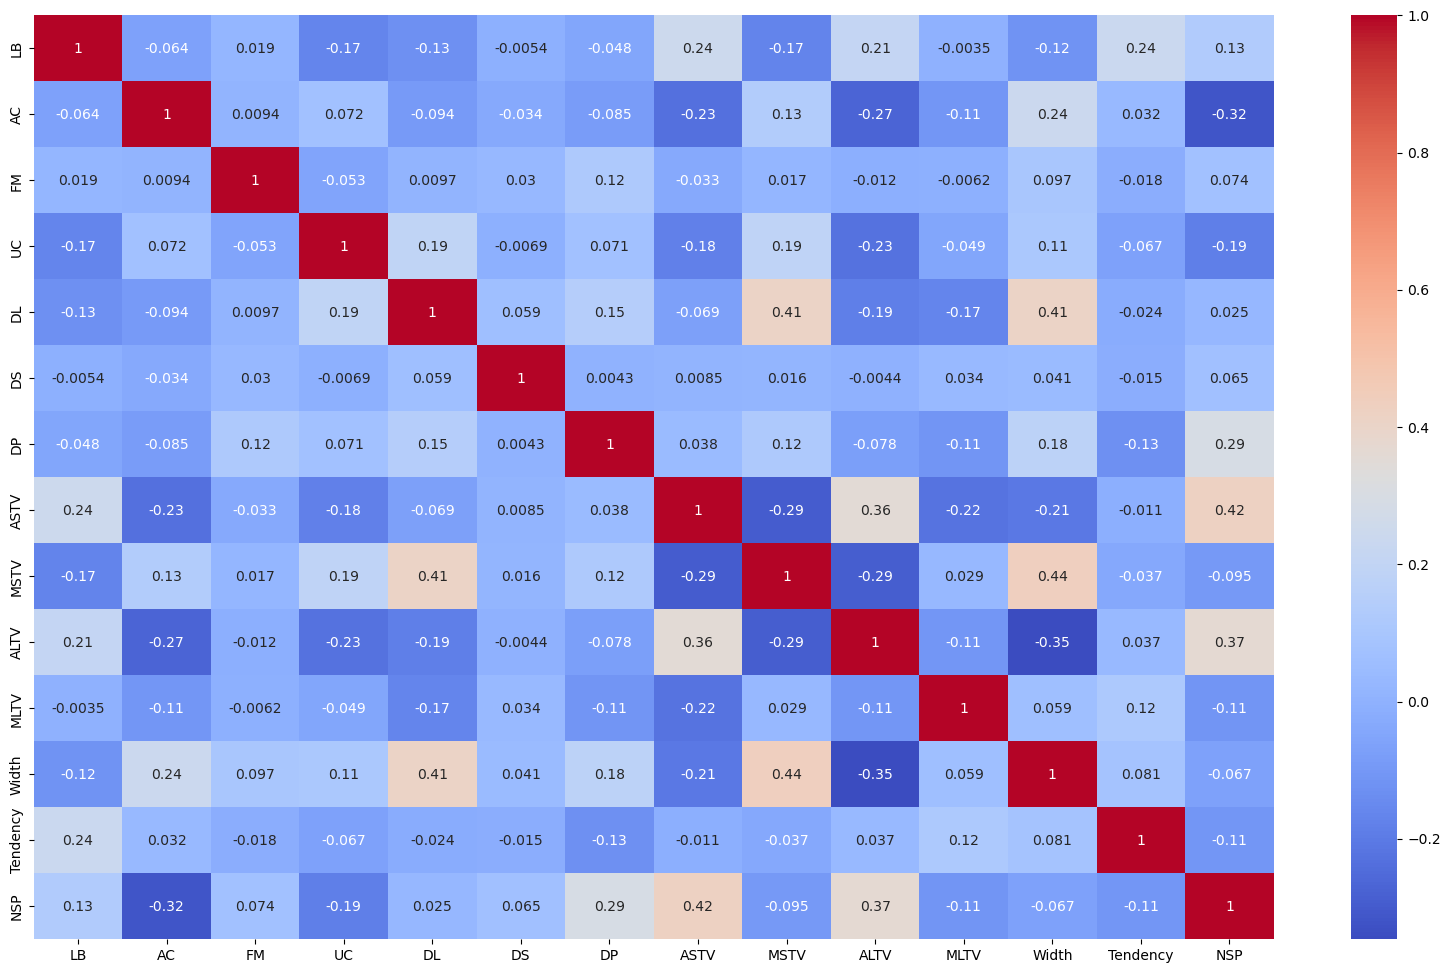

In [17]:
#Heatmap of Correlation of Parameter
plt.figure(figsize=[20,12])
sb.heatmap(tt, annot=True, cmap='coolwarm')
plt.show()

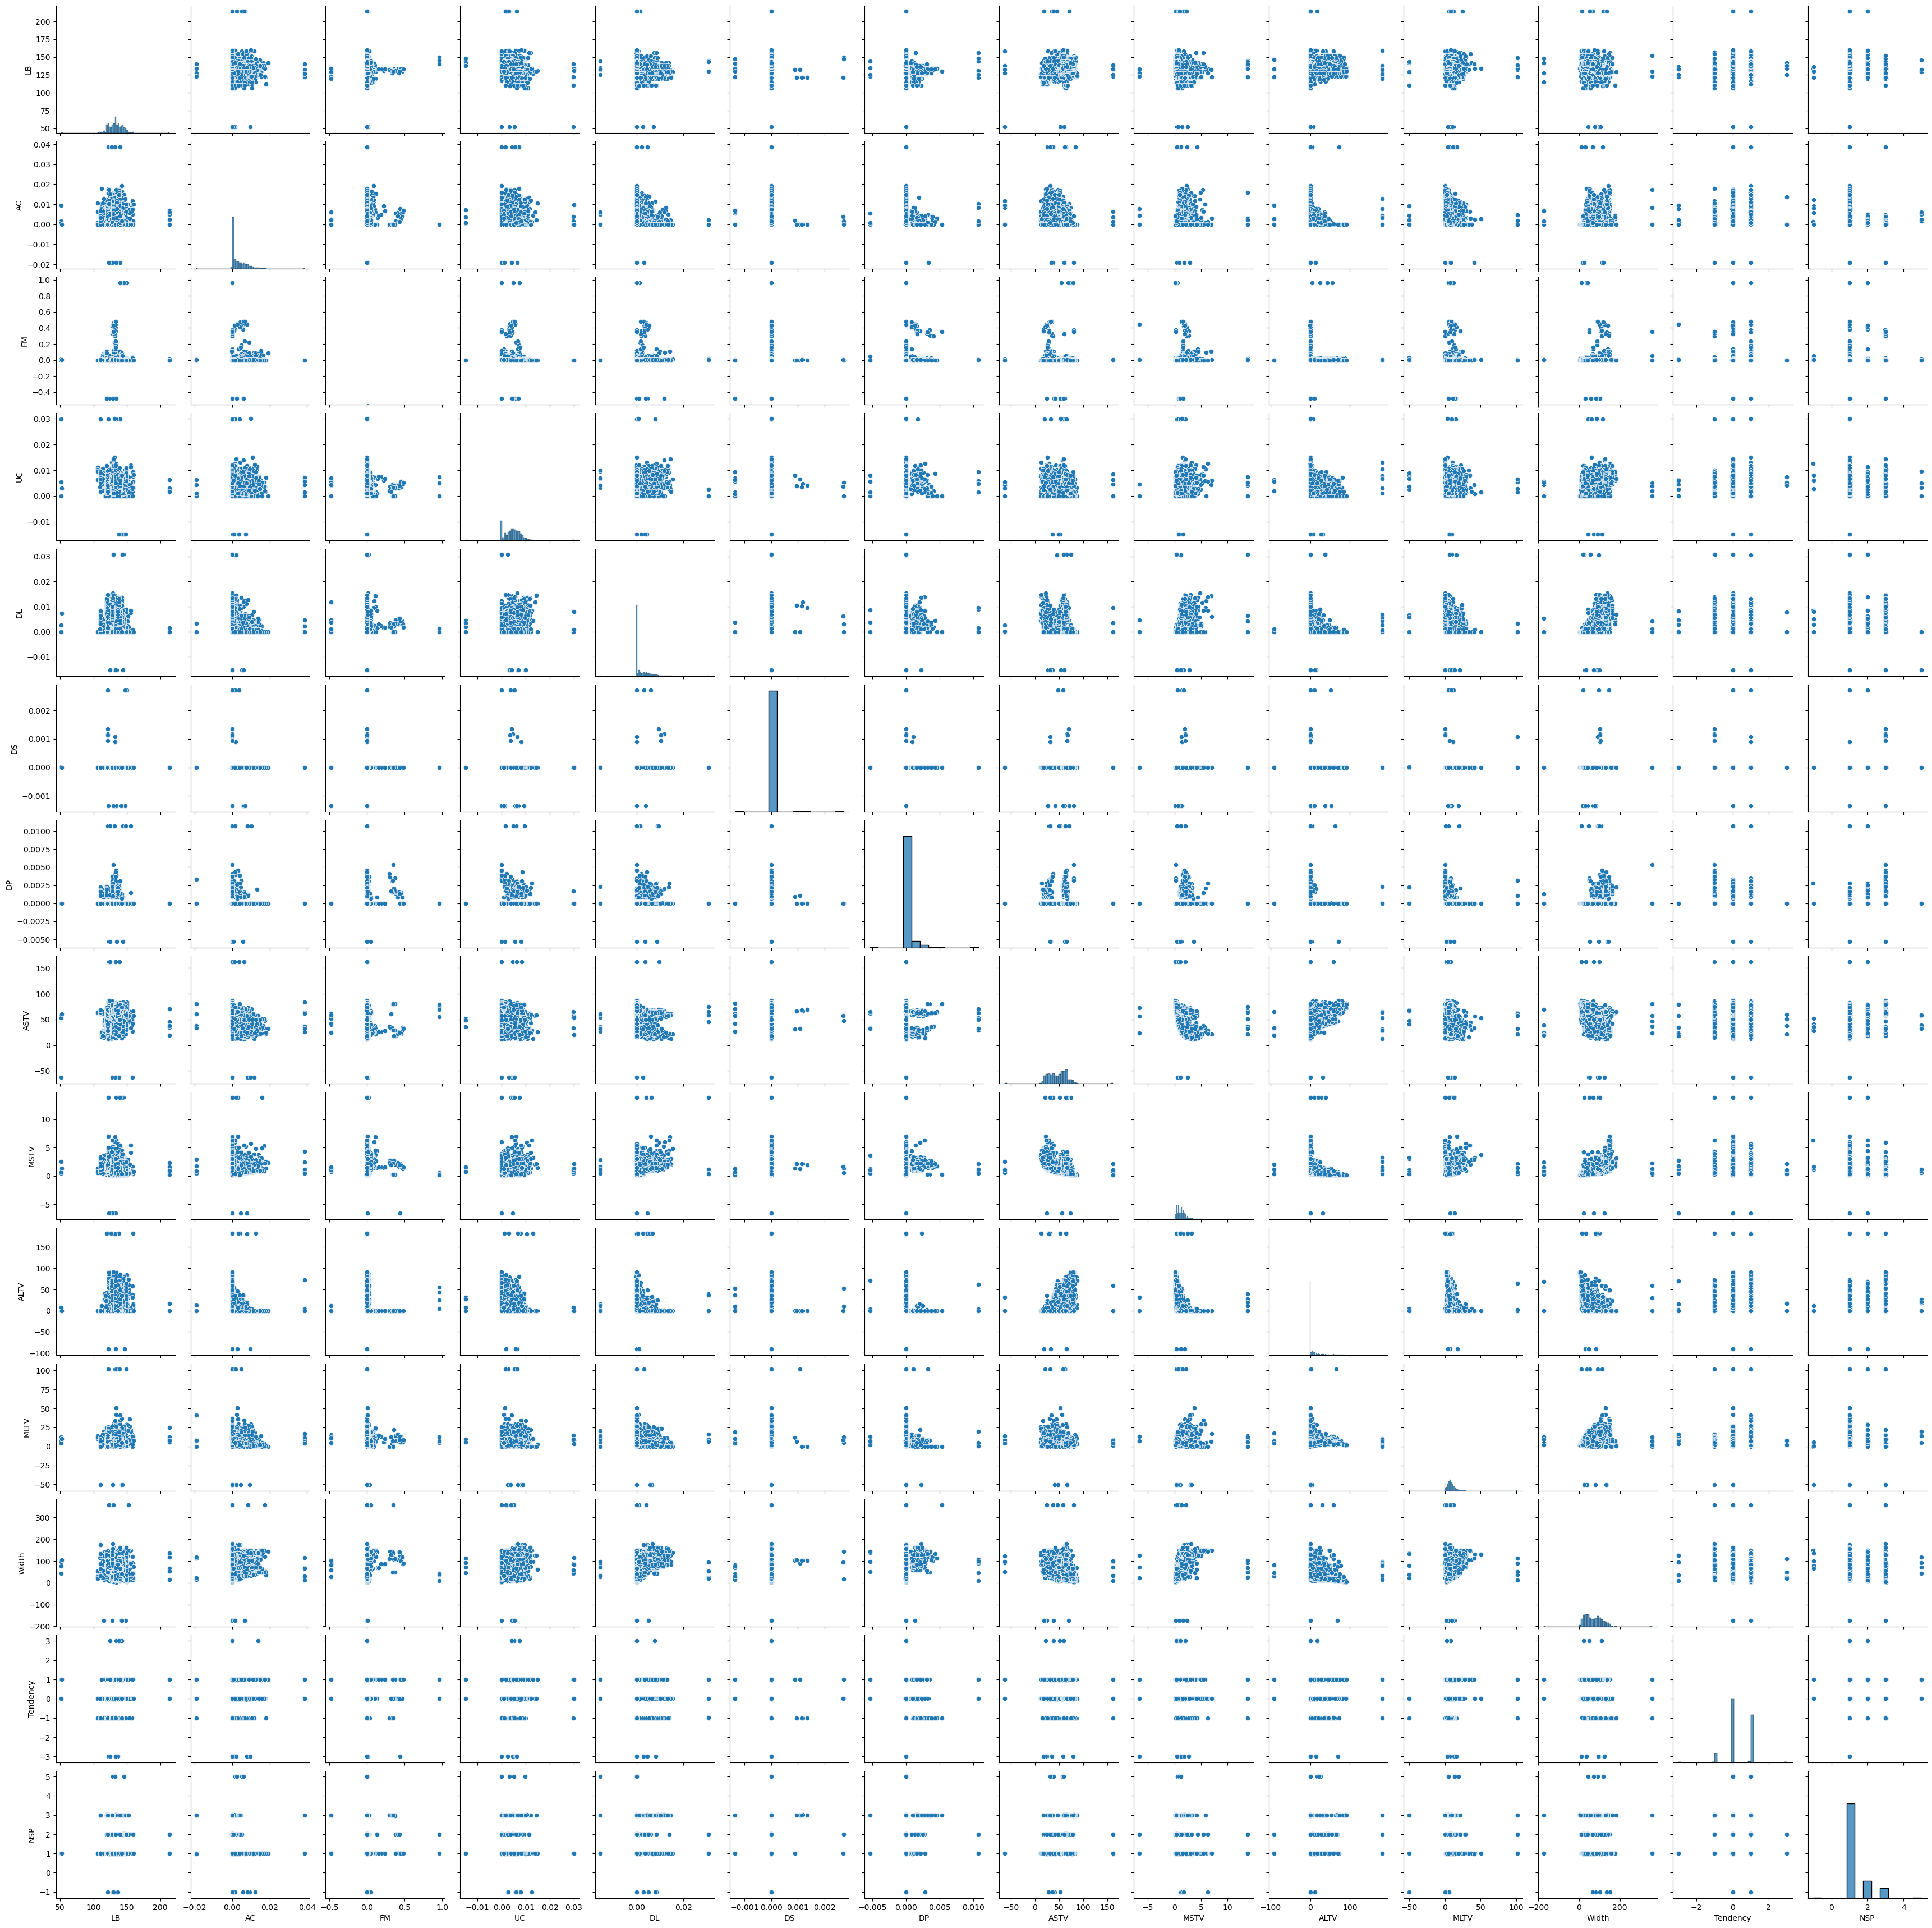

In [18]:
sb.pairplot(df)
plt.show()

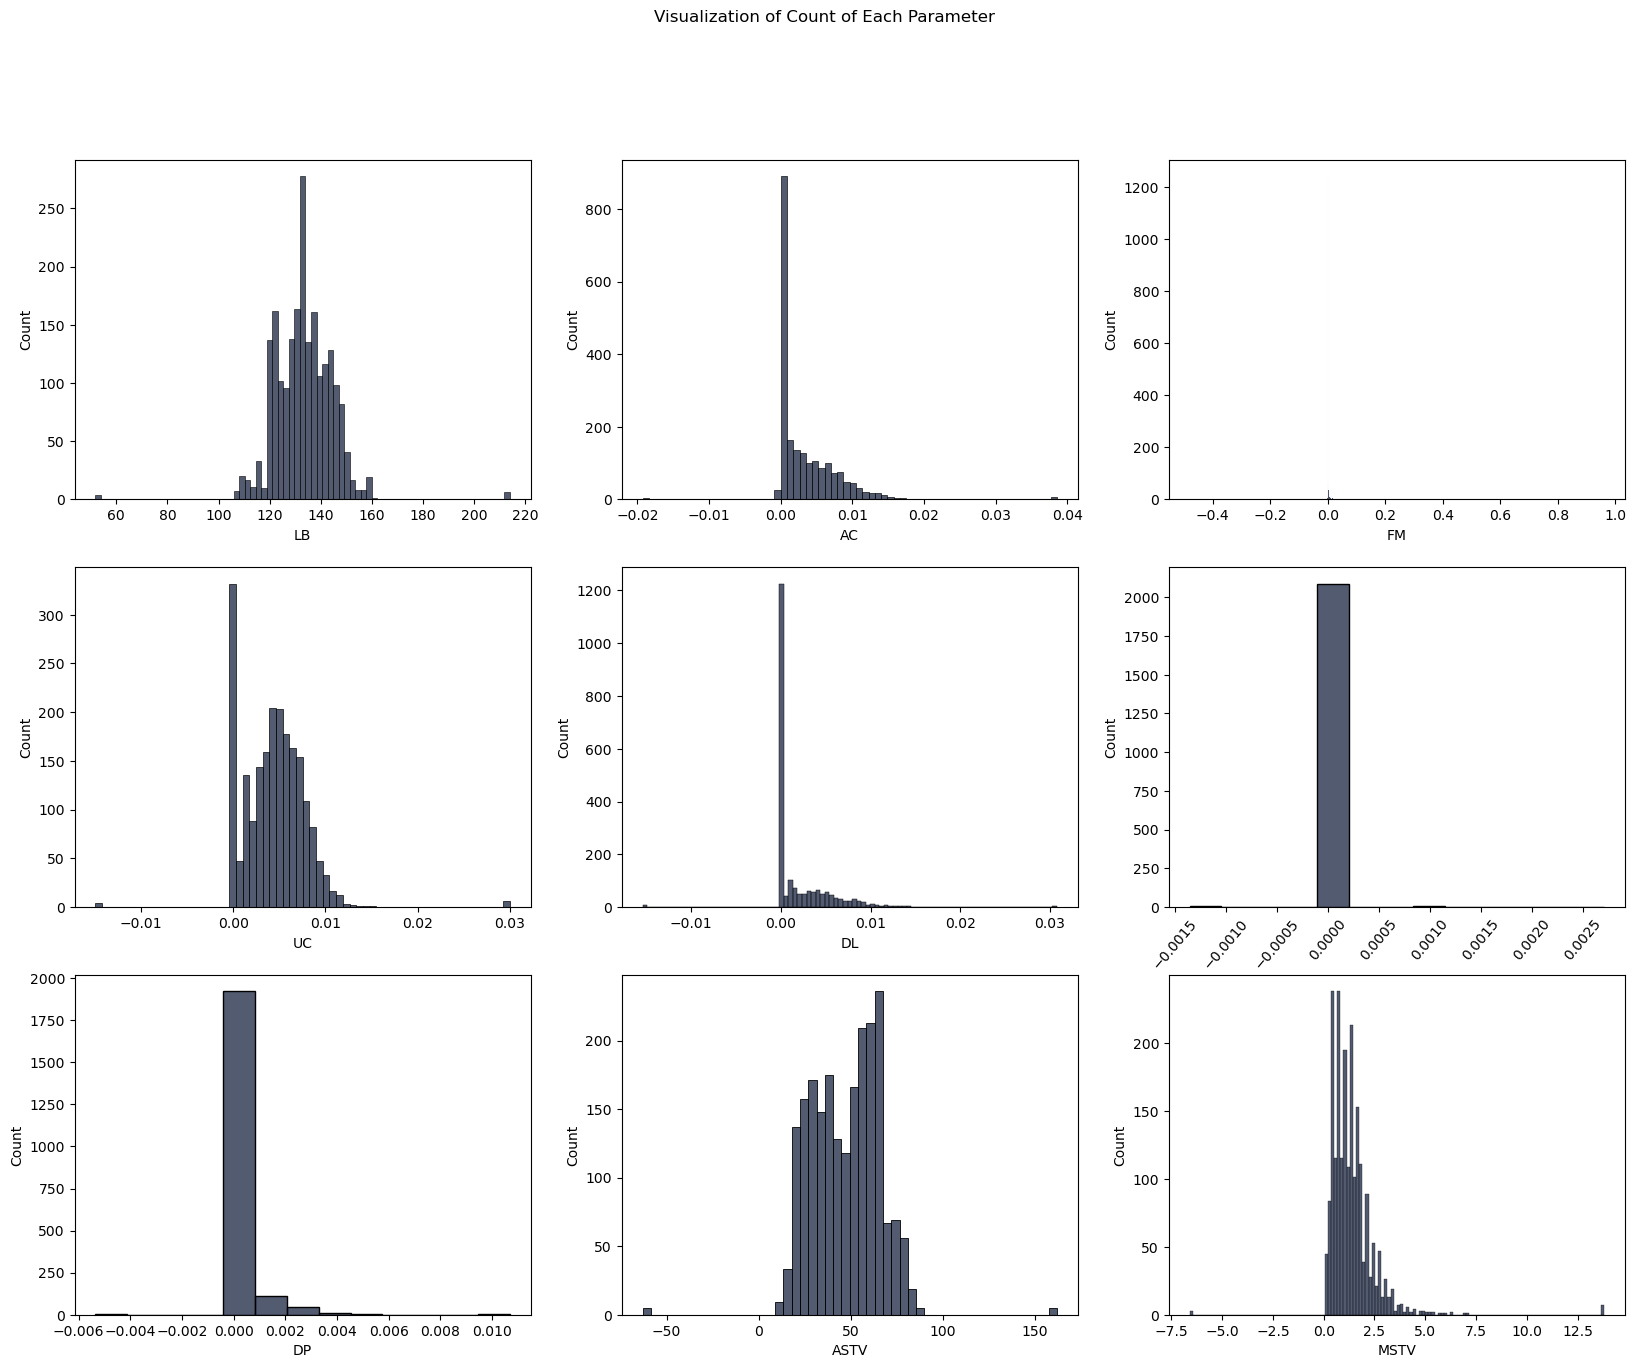

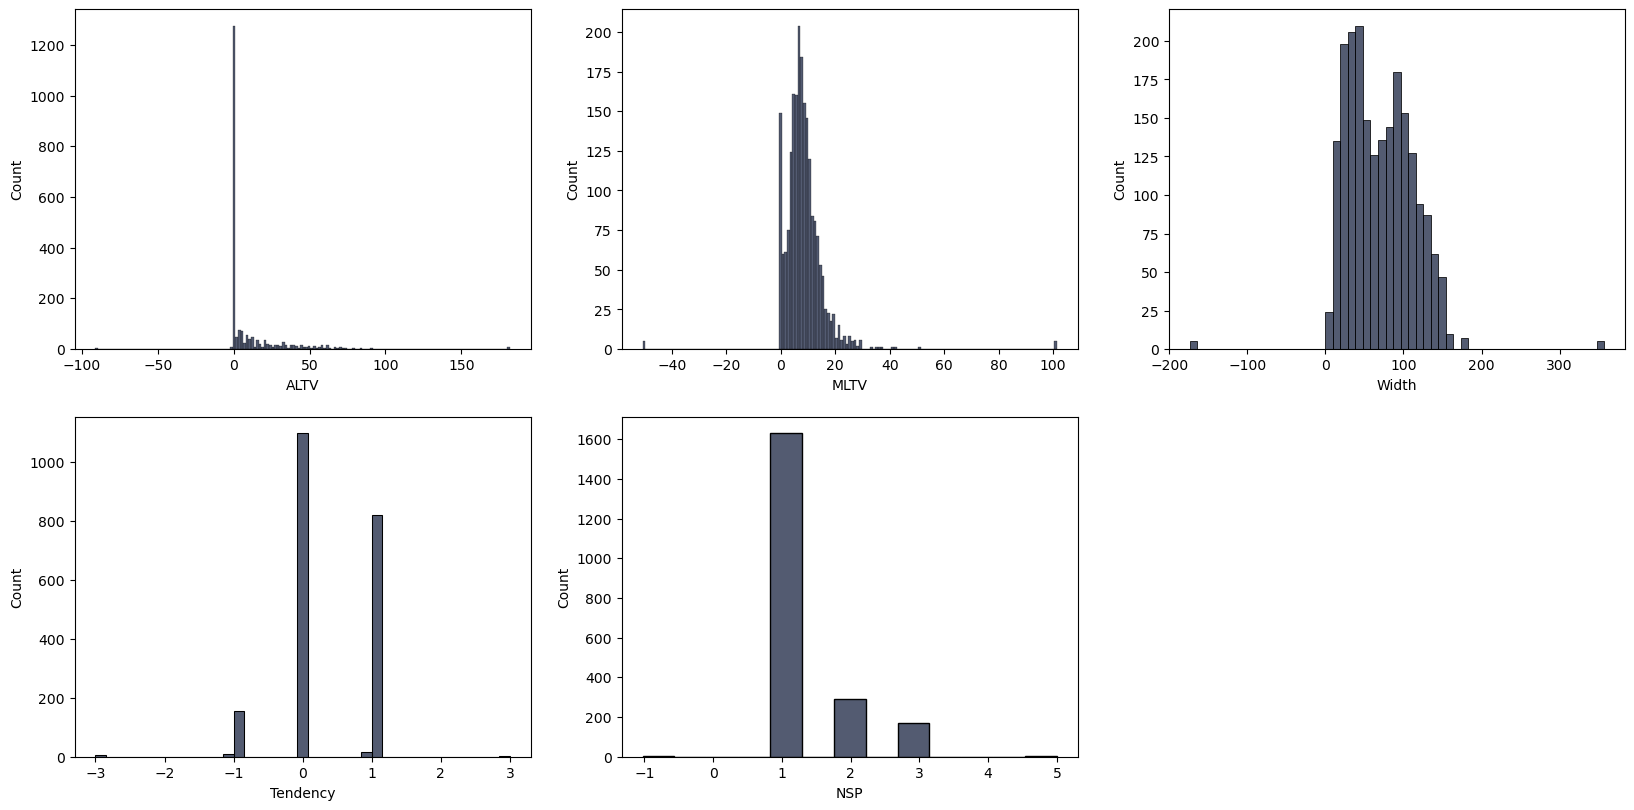

In [19]:
sb.set_palette('cubehelix')
fig = plt.figure(figsize=[20,15])

plt.suptitle("Visualization of Count of Each Parameter")
ax1 = fig.add_subplot(331)
sb.histplot(df.LB)

ax2 = fig.add_subplot(332)
sb.histplot(df.AC)

ax3 = fig.add_subplot(333)
sb.histplot(df.FM)

ax4 = fig.add_subplot(334)
sb.histplot(df.UC)

ax5 = fig.add_subplot(335)
sb.histplot(df.DL)

ax6 = fig.add_subplot(336)
sb.histplot(df.DS)
plt.xticks(rotation=50)

ax7 = fig.add_subplot(337)
sb.histplot(df.DP)

ax8 = fig.add_subplot(338)
sb.histplot(df.ASTV)

ax9 = fig.add_subplot(339)
sb.histplot(df.MSTV)


fig = plt.figure(figsize=[20,15])
ax1 = fig.add_subplot(331)
sb.histplot(df.ALTV)

ax2 = fig.add_subplot(332)
sb.histplot(df.MLTV)

ax3 = fig.add_subplot(333)
sb.histplot(df.Width)

ax4 = fig.add_subplot(334)
sb.histplot(df.Tendency)

ax5 = fig.add_subplot(335)
sb.histplot(df.NSP)

plt.show()

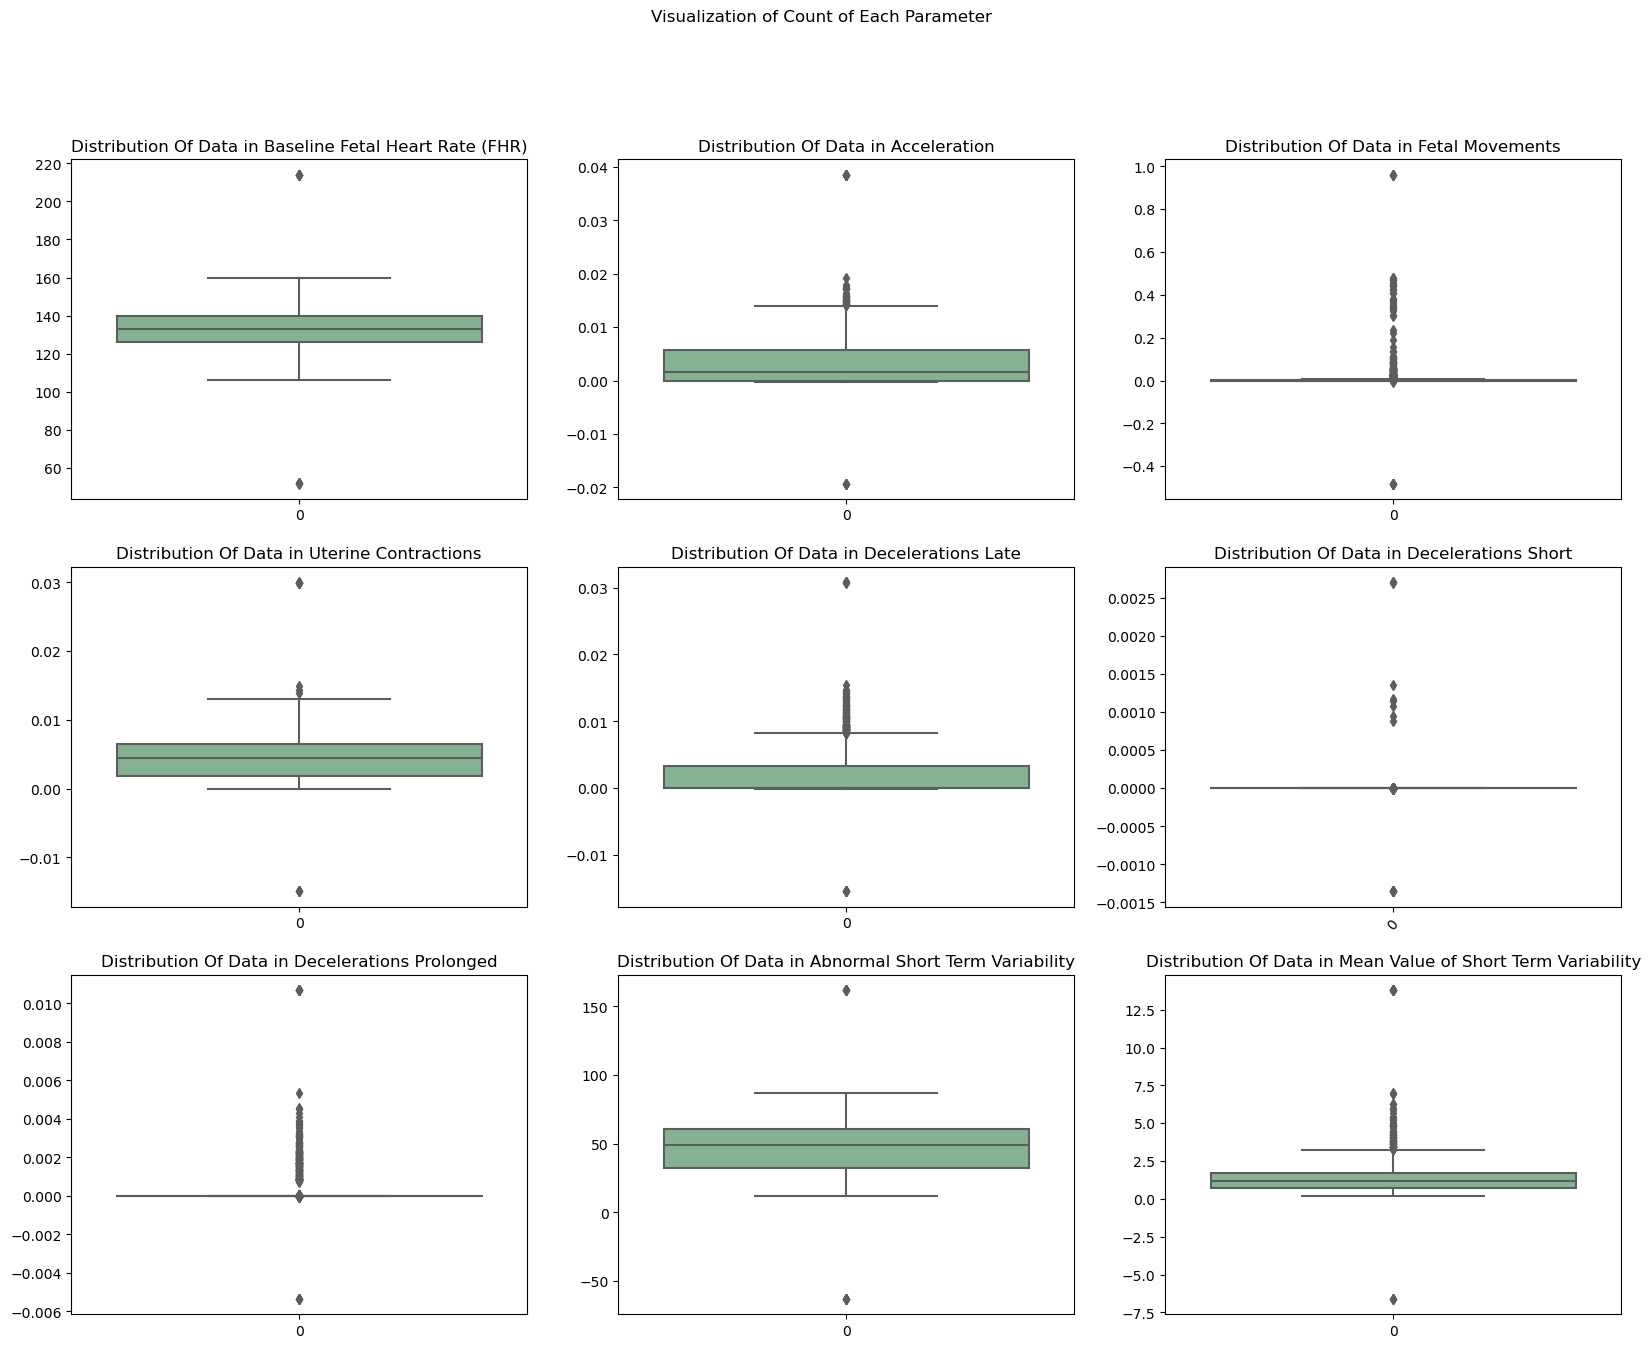

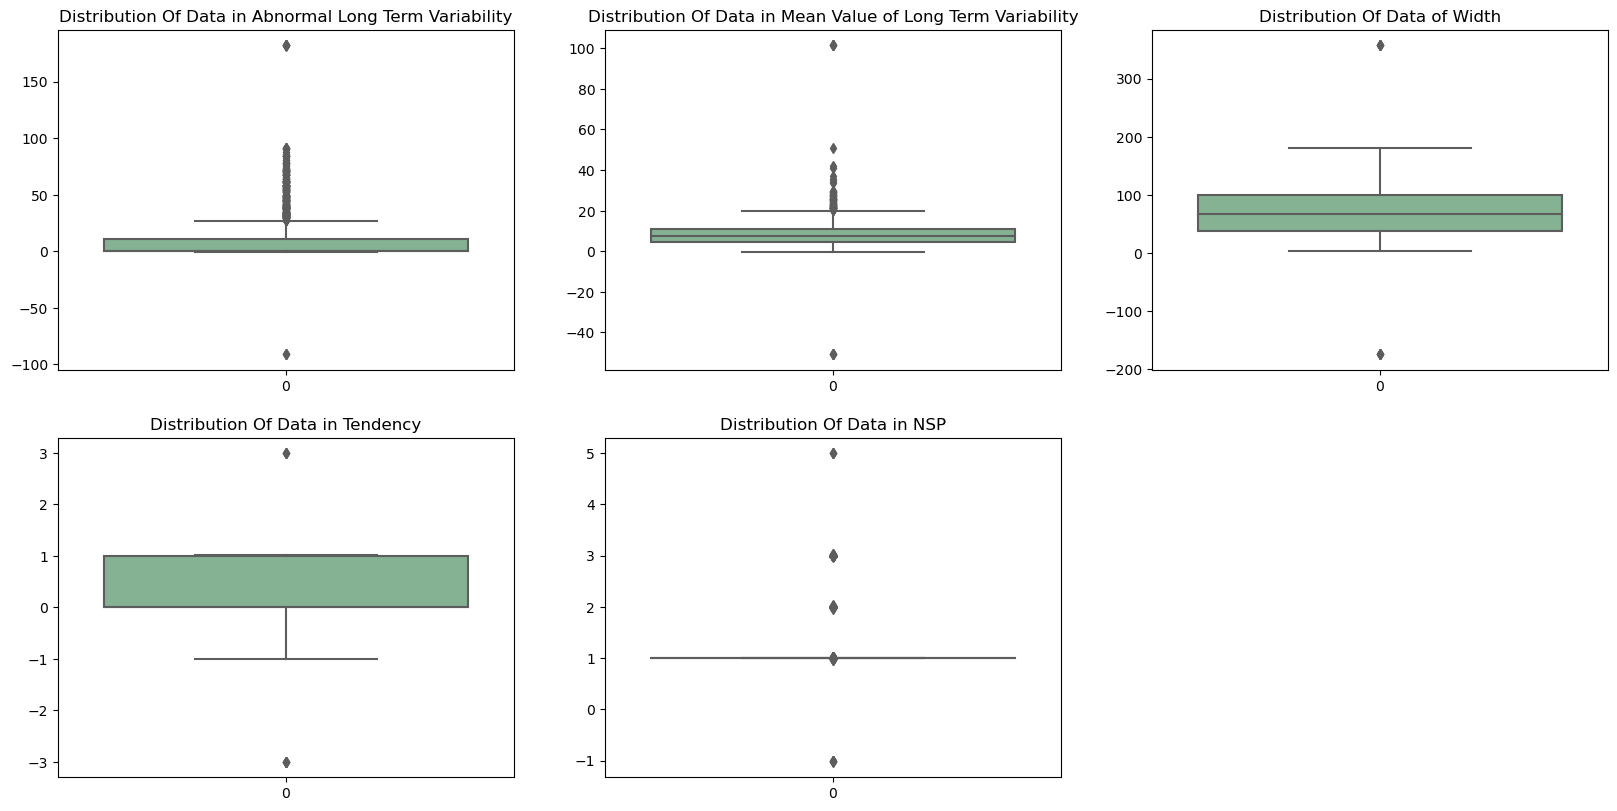

In [20]:
sb.set_palette('crest')

fig = plt.figure(figsize=[20,15])

plt.suptitle("Visualization of Count of Each Parameter")
ax1 = fig.add_subplot(331)
sb.boxplot(df.LB)
plt.title('Distribution Of Data in Baseline Fetal Heart Rate (FHR)')

ax2 = fig.add_subplot(332)
sb.boxplot(df.AC)
plt.title('Distribution Of Data in Acceleration')

ax3 = fig.add_subplot(333)
sb.boxplot(df.FM)
plt.title('Distribution Of Data in Fetal Movements')

ax4 = fig.add_subplot(334)
sb.boxplot(df.UC)
plt.title('Distribution Of Data in Uterine Contractions')

ax5 = fig.add_subplot(335)
sb.boxplot(df.DL)
plt.title('Distribution Of Data in Decelerations Late')

ax6 = fig.add_subplot(336)
sb.boxplot(df.DS)
plt.xticks(rotation=50)
plt.title('Distribution Of Data in Decelerations Short')

ax7 = fig.add_subplot(337)
sb.boxplot(df.DP)
plt.title('Distribution Of Data in Decelerations Prolonged')

ax8 = fig.add_subplot(338)
sb.boxplot(df.ASTV)
plt.title('Distribution Of Data in Abnormal Short Term Variability')

ax9 = fig.add_subplot(339)
sb.boxplot(df.MSTV)
plt.title('Distribution Of Data in Mean Value of Short Term Variability')


fig = plt.figure(figsize=[20,15])
ax1 = fig.add_subplot(331)
sb.boxplot(df.ALTV)
plt.title('Distribution Of Data in Abnormal Long Term Variability')

ax2 = fig.add_subplot(332)
sb.boxplot(df.MLTV)
plt.title('Distribution Of Data in Mean Value of Long Term Variability')

ax3 = fig.add_subplot(333)
sb.boxplot(df.Width)
plt.title('Distribution Of Data of Width')

ax4 = fig.add_subplot(334)
sb.boxplot(df.Tendency)
plt.title('Distribution Of Data in Tendency')

ax5 = fig.add_subplot(335)
sb.boxplot(df.NSP)
plt.title('Distribution Of Data in NSP')

plt.show()

In [21]:
a1 = df.LB.value_counts().nlargest(10)
b1=df.groupby('LB')['NSP'].sum().nlargest(10)
a2 = df.AC.value_counts().nlargest(10)
b2=df.groupby('AC')['NSP'].sum().nlargest(10)
a3 = df.FM.value_counts().nlargest(10)
b3=df.groupby('FM')['NSP'].sum().nlargest(10)
a4 = df.UC.value_counts().nlargest(10)
b4=df.groupby('UC')['NSP'].sum().nlargest(10)
a5 = df.DL.value_counts().nlargest(10)
b5=df.groupby('DL')['NSP'].sum().nlargest(10)
a6 = df.DS.value_counts().nlargest(10)
b6=df.groupby('DS')['NSP'].sum().nlargest(10)
a7 = df.DP.value_counts().nlargest(10)
b7=df.groupby('DP')['NSP'].sum().nlargest(10)
a8 = df.ASTV.value_counts().nlargest(10)
b8=df.groupby('ASTV')['NSP'].sum().nlargest(10)
a9 = df.MSTV.value_counts().nlargest(10)
b9=df.groupby('MSTV')['NSP'].sum().nlargest(10)
a10 = df.ALTV.value_counts().nlargest(10)
b10=df.groupby('ALTV')['NSP'].sum().nlargest(10)
a11 = df.MLTV.value_counts().nlargest(10)
b11=df.groupby('MLTV')['NSP'].sum().nlargest(10)
a12 = df.Width.value_counts().nlargest(10)
b12=df.groupby('Width')['NSP'].sum().nlargest(10)
a13 = df.Tendency.value_counts().nlargest(10)
b13=df.groupby('Tendency')['NSP'].sum().nlargest(10)
a14 = df.NSP.value_counts().nlargest(10)
b14=df.groupby('NSP')['NSP'].sum().nlargest(10)

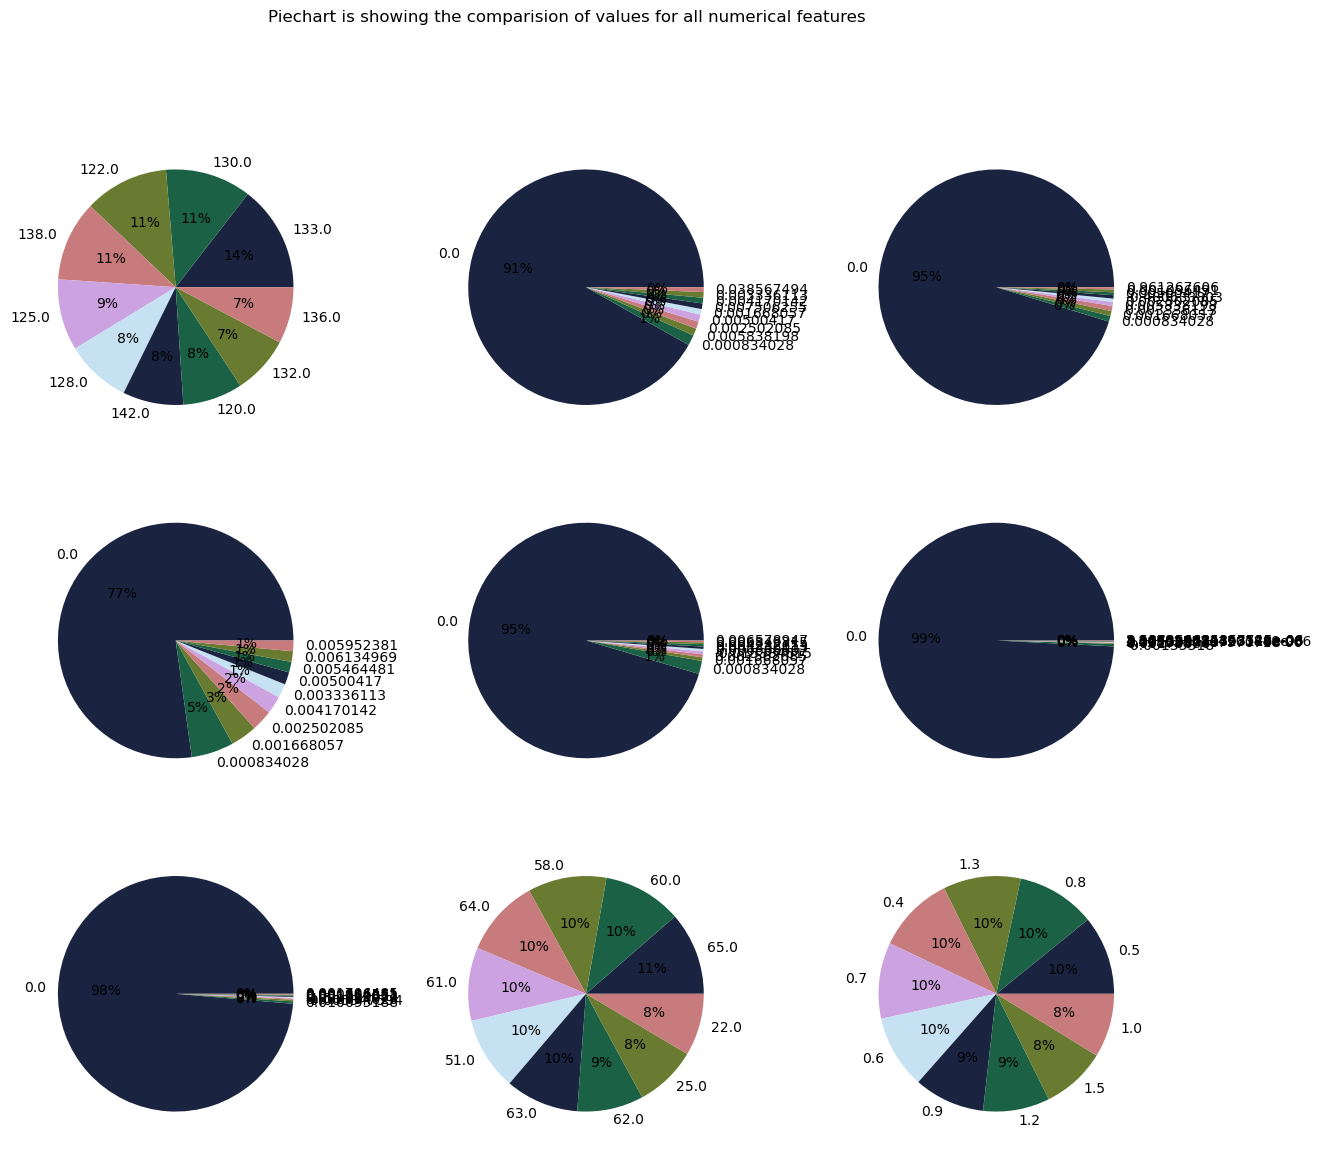

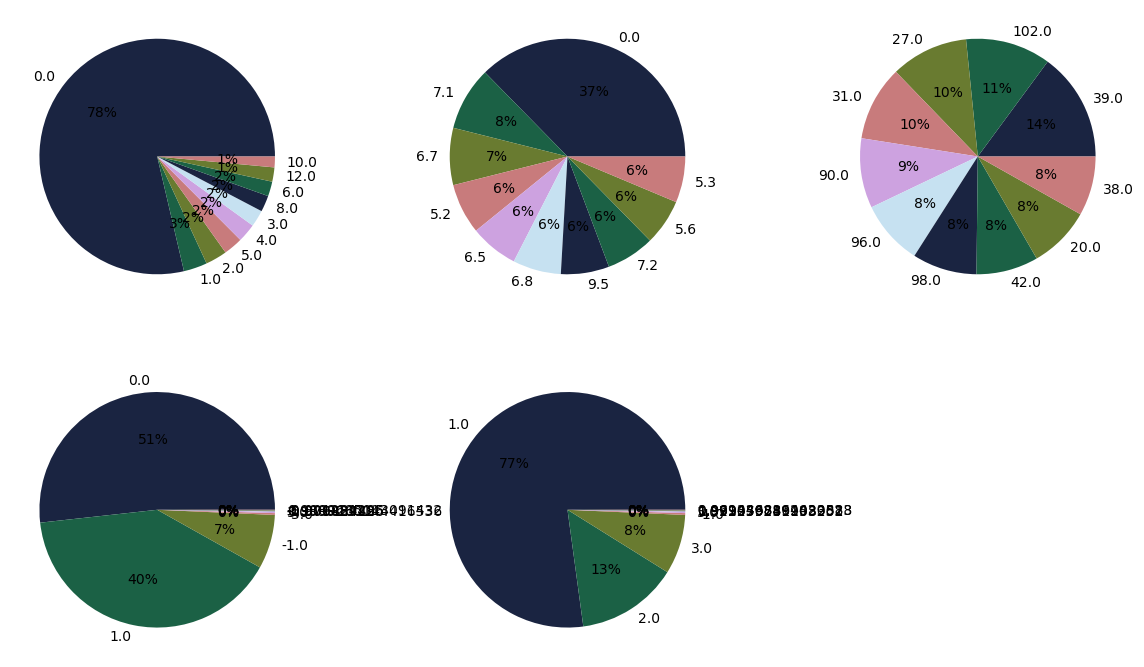

In [22]:
# Use bar charts or pie charts to display the frequency of categories for categorical variables.
sb.set_palette('cubehelix')

fig = plt.figure(figsize=[15,13])

plt.suptitle("Piechart is showing the comparision of values for all numerical features")
ax1 = fig.add_subplot(331)
plt.pie(a1.values , labels=a1.index , autopct='%d%%')

ax2 = fig.add_subplot(332)
plt.pie(a2.values , labels=a2.index , autopct='%d%%' )

ax3 = fig.add_subplot(333)
plt.pie(a3.values , labels=a3.index , autopct='%d%%')

ax4 = fig.add_subplot(334)
plt.pie(a4.values , labels=a4.index , autopct='%d%%' )

ax5 = fig.add_subplot(335)
plt.pie(a5.values , labels=a5.index , autopct='%d%%' )

ax6 = fig.add_subplot(336)
plt.pie(a6.values , labels=a6.index , autopct='%d%%' )

ax7 = fig.add_subplot(337)
plt.pie(a7.values , labels=a7.index , autopct='%d%%' )

ax8 = fig.add_subplot(338)
plt.pie(a8.values , labels=a8.index , autopct='%d%%' )

ax9 = fig.add_subplot(339)
plt.pie(a9.values , labels=a9.index , autopct='%d%%' )


fig = plt.figure(figsize=[15,13])
ax1 = fig.add_subplot(331)
plt.pie(a10.values , labels=a10.index , autopct='%d%%' )

ax2 = fig.add_subplot(332)
plt.pie(a11.values , labels=a11.index , autopct='%d%%' )

ax3 = fig.add_subplot(333)
plt.pie(a12.values , labels=a12.index , autopct='%d%%' )

ax4 = fig.add_subplot(334)
plt.pie(a13.values , labels=a13.index , autopct='%d%%')

ax5 = fig.add_subplot(335)
plt.pie(a14.values , labels=a14.index , autopct='%d%%' )



plt.show()

In [23]:
b1

LB
133.0    187.048306
130.0    135.950836
138.0    125.972498
128.0    111.007847
122.0    108.982801
120.0    105.070301
144.0     99.011137
134.0     91.989195
125.0     89.995871
132.0     87.010714
Name: NSP, dtype: float64

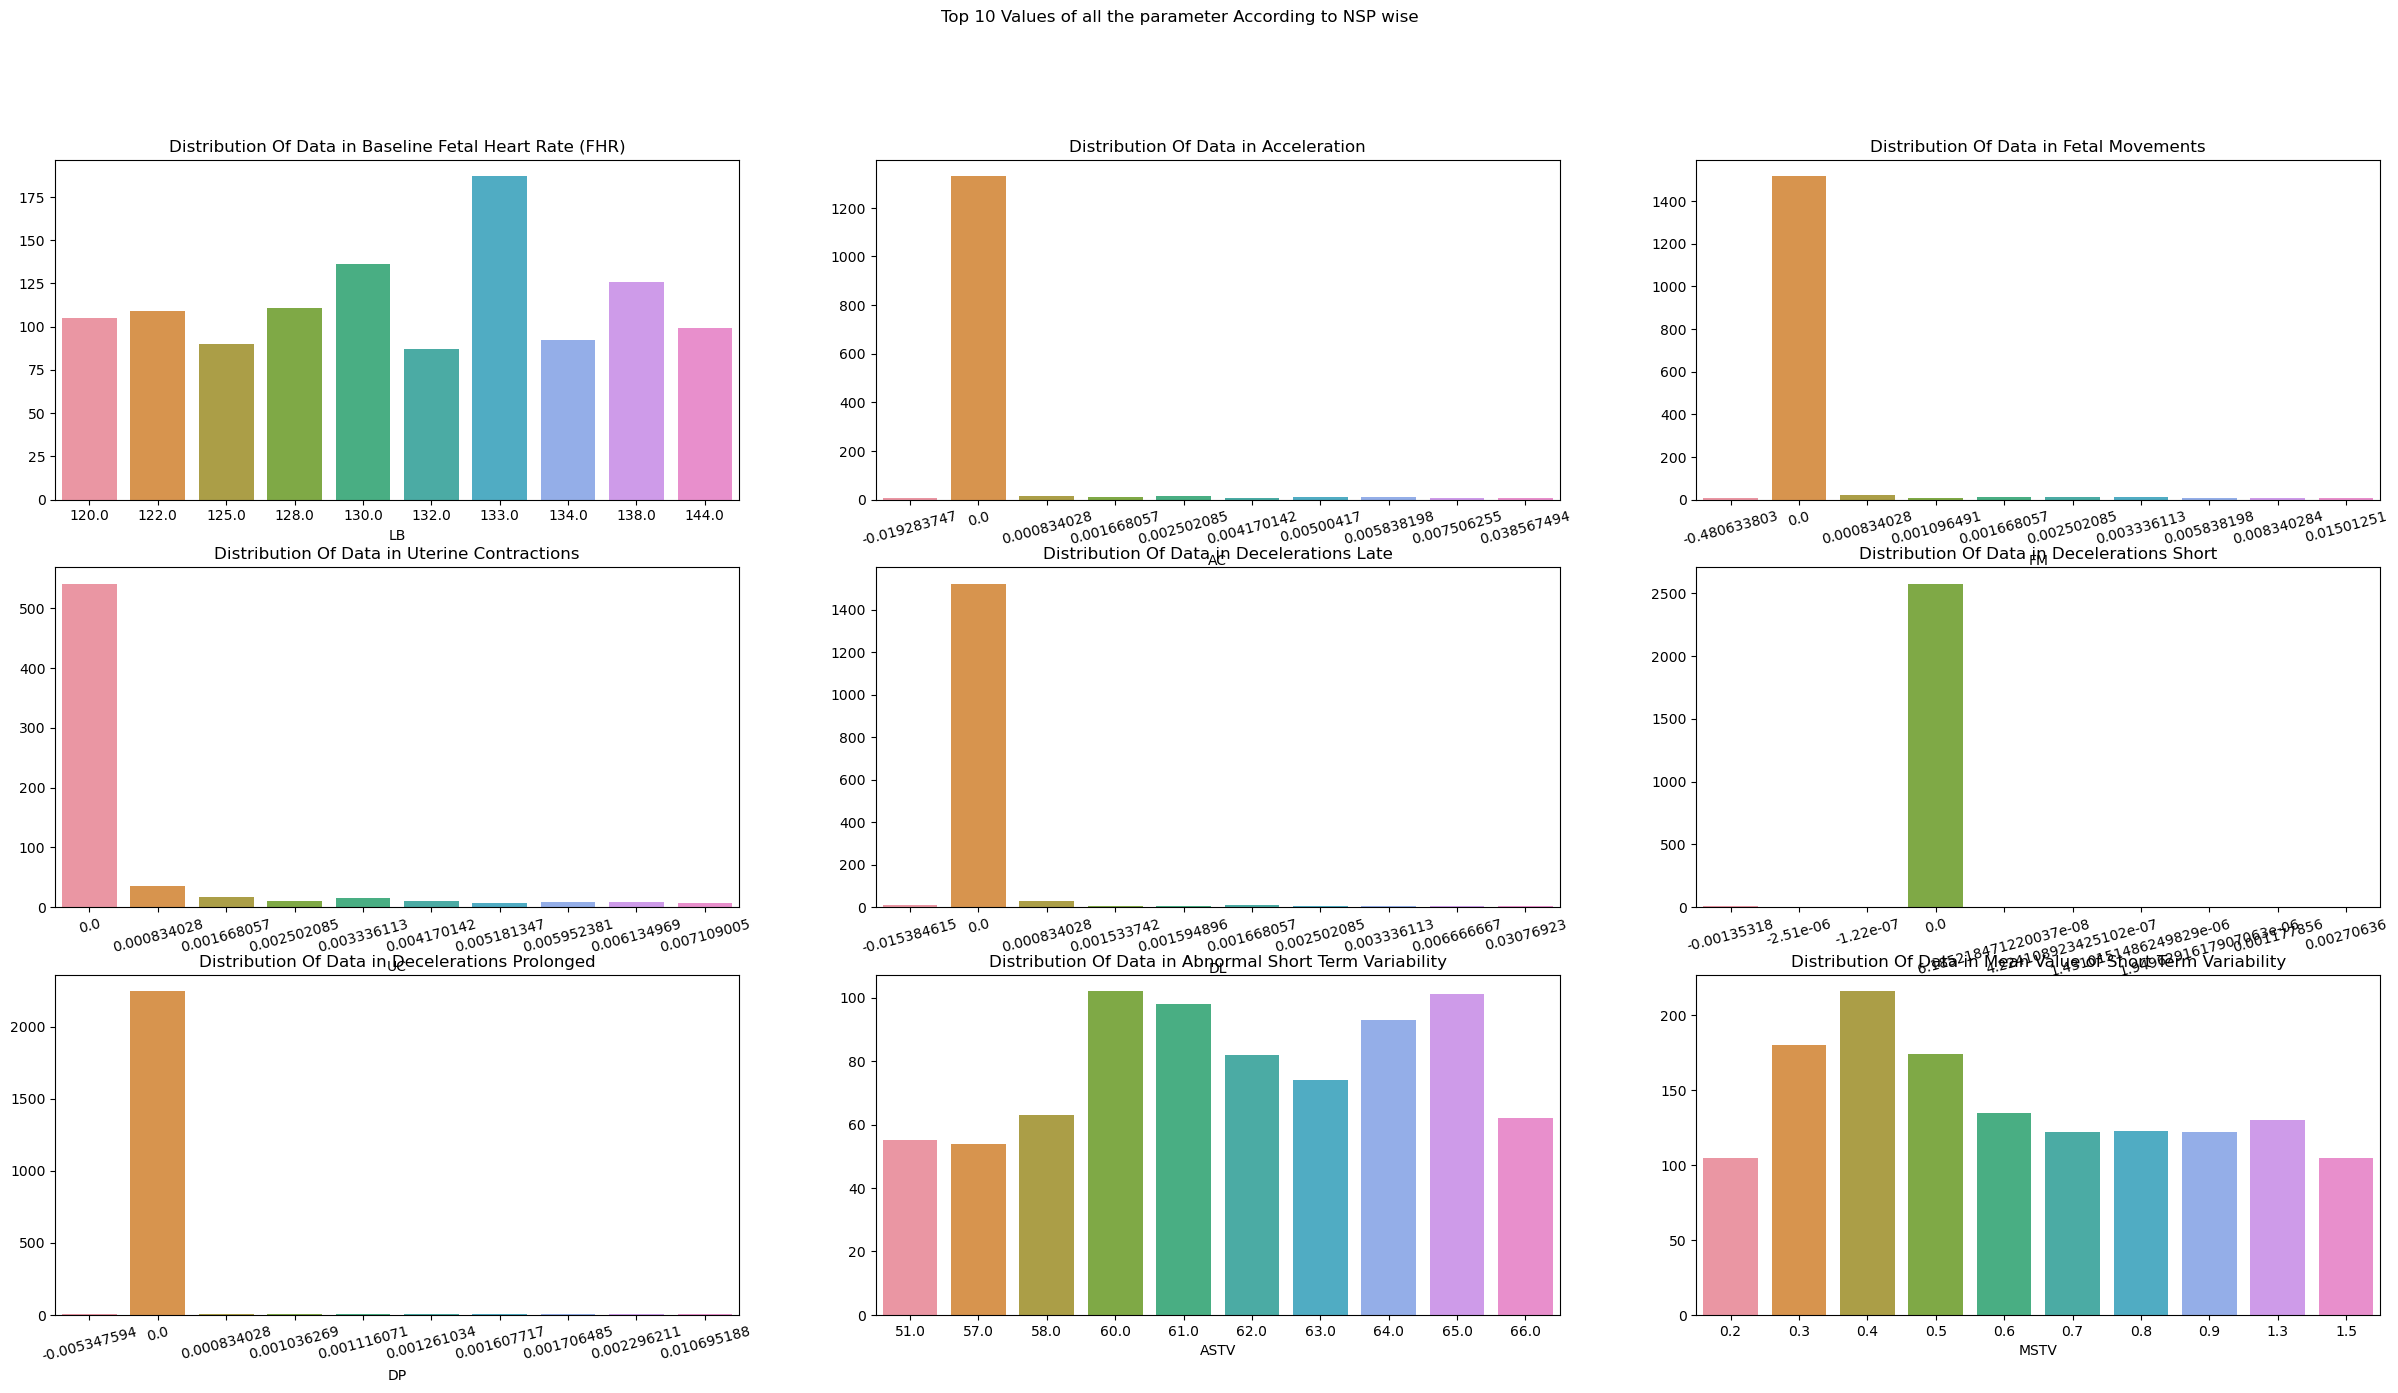

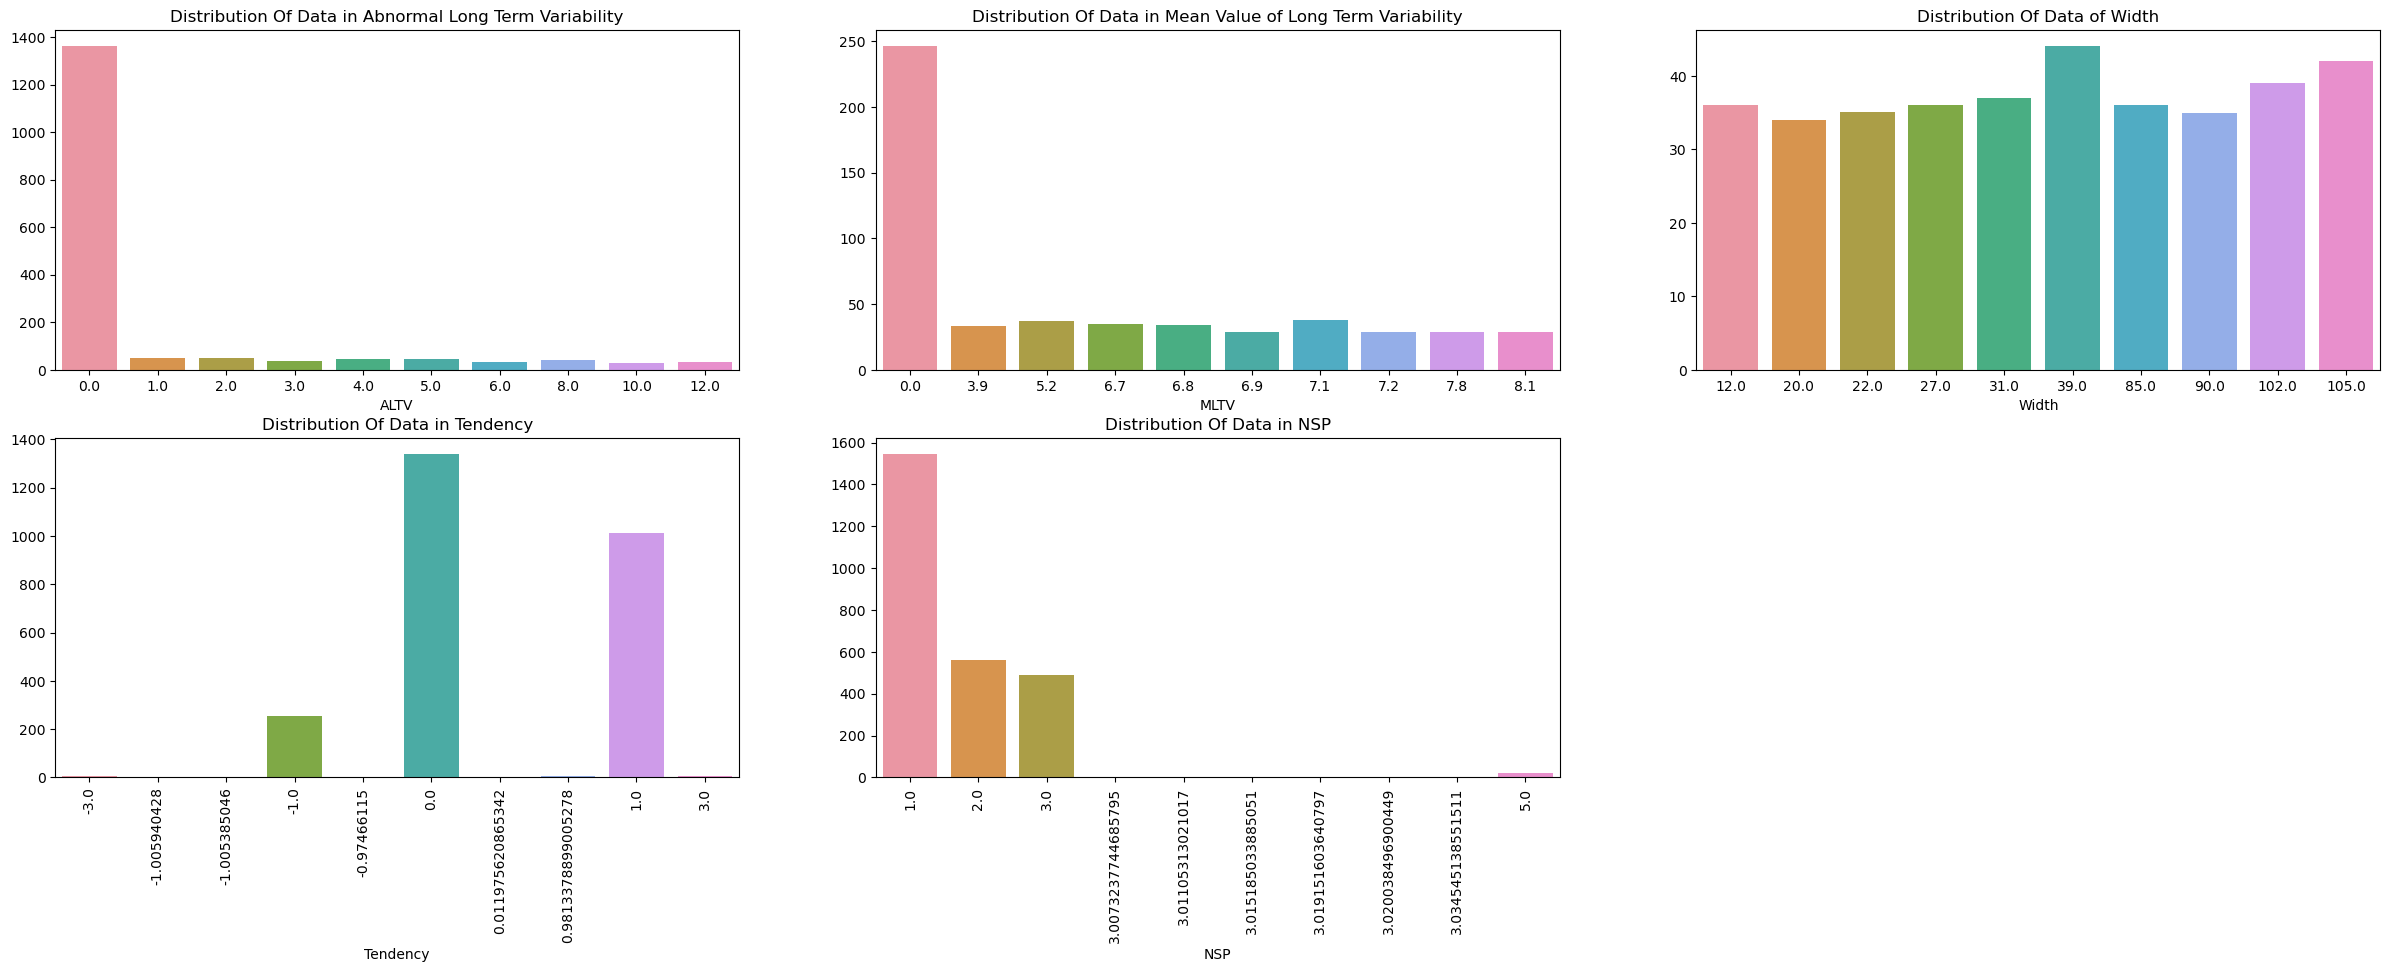

In [24]:
sb.set_palette('crest')
fig = plt.figure(figsize=[30,15])
plt.suptitle("Top 10 Values of all the parameter According to NSP wise")

ax1 = fig.add_subplot(331)
sb.barplot(x=b1.index,y=b1.values)
plt.title('Distribution Of Data in Baseline Fetal Heart Rate (FHR)')

ax2 = fig.add_subplot(332)
sb.barplot(x=b2.index,y=b2.values)
plt.xticks(rotation=15)
plt.title('Distribution Of Data in Acceleration')

ax3 = fig.add_subplot(333)
sb.barplot(x=b3.index,y=b3.values)
plt.xticks(rotation=15)
plt.title('Distribution Of Data in Fetal Movements')

ax4 = fig.add_subplot(334)
sb.barplot(x=b4.index,y=b4.values)
plt.xticks(rotation=15)
plt.title('Distribution Of Data in Uterine Contractions')

ax5 = fig.add_subplot(335)
sb.barplot(x=b5.index,y=b5.values)
plt.xticks(rotation=15)
plt.title('Distribution Of Data in Decelerations Late')

ax6 = fig.add_subplot(336)
sb.barplot(x=b6.index,y=b6.values)
plt.xticks(rotation=15)
plt.title('Distribution Of Data in Decelerations Short')

ax7 = fig.add_subplot(337)
sb.barplot(x=b7.index,y=b7.values)
plt.xticks(rotation=15)
plt.title('Distribution Of Data in Decelerations Prolonged')

ax8 = fig.add_subplot(338)
sb.barplot(x=b8.index,y=b8.values)
plt.title('Distribution Of Data in Abnormal Short Term Variability')

ax9 = fig.add_subplot(339)
sb.barplot(x=b9.index,y=b9.values)
plt.title('Distribution Of Data in Mean Value of Short Term Variability')


fig = plt.figure(figsize=[30,15])
ax1 = fig.add_subplot(331)
sb.barplot(x=b10.index,y=b10.values)
plt.title('Distribution Of Data in Abnormal Long Term Variability')

ax2 = fig.add_subplot(332)
sb.barplot(x=b11.index,y=b11.values)
plt.title('Distribution Of Data in Mean Value of Long Term Variability')

ax3 = fig.add_subplot(333)
sb.barplot(x=b12.index,y=b12.values)
plt.title('Distribution Of Data of Width')

ax4 = fig.add_subplot(334)
sb.barplot(x=b13.index,y=b13.values)
plt.xticks(rotation=90)
plt.title('Distribution Of Data in Tendency')

ax5=fig.add_subplot(335)
sb.barplot(x=b14.index,y=b14.values)
plt.xticks(rotation=90)
plt.title('Distribution Of Data in NSP')

plt.show()

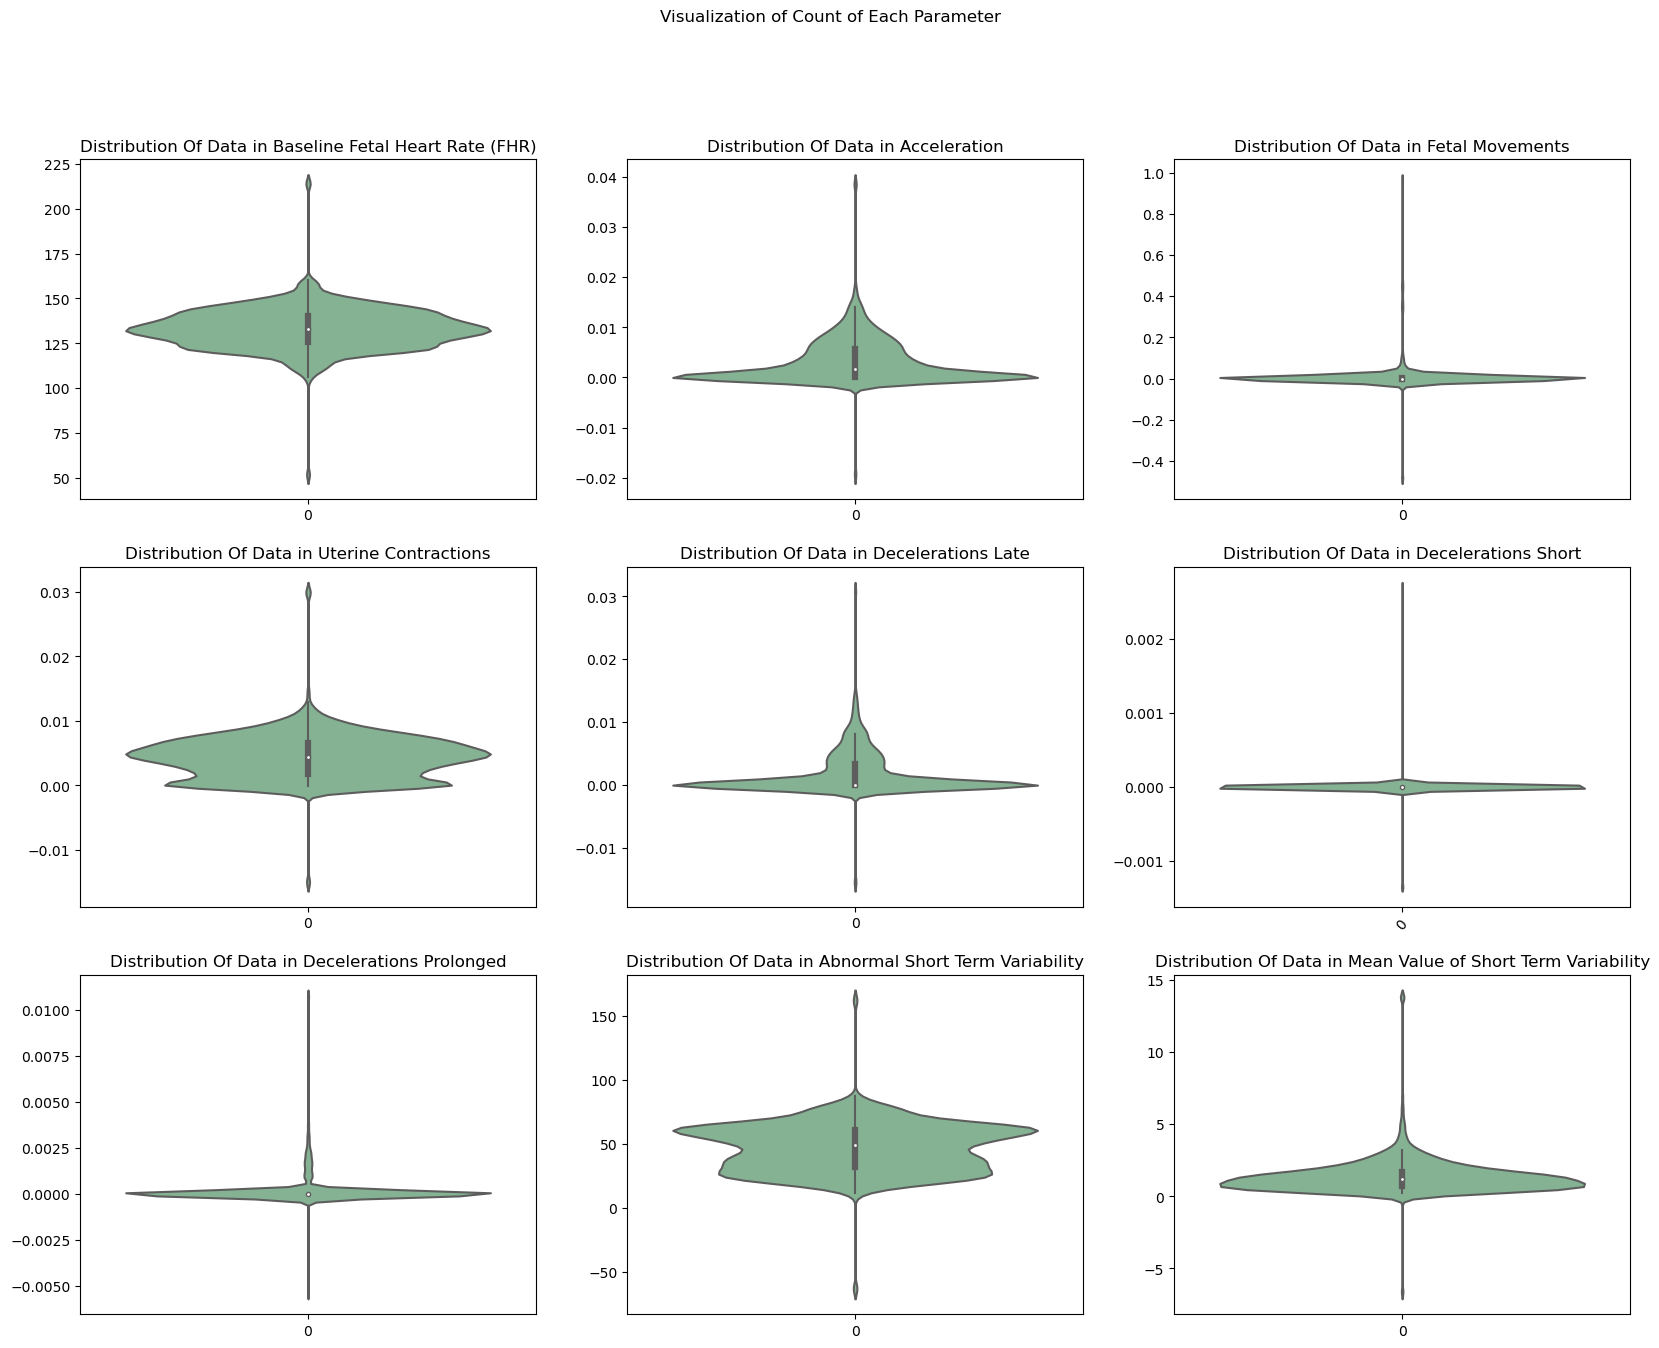

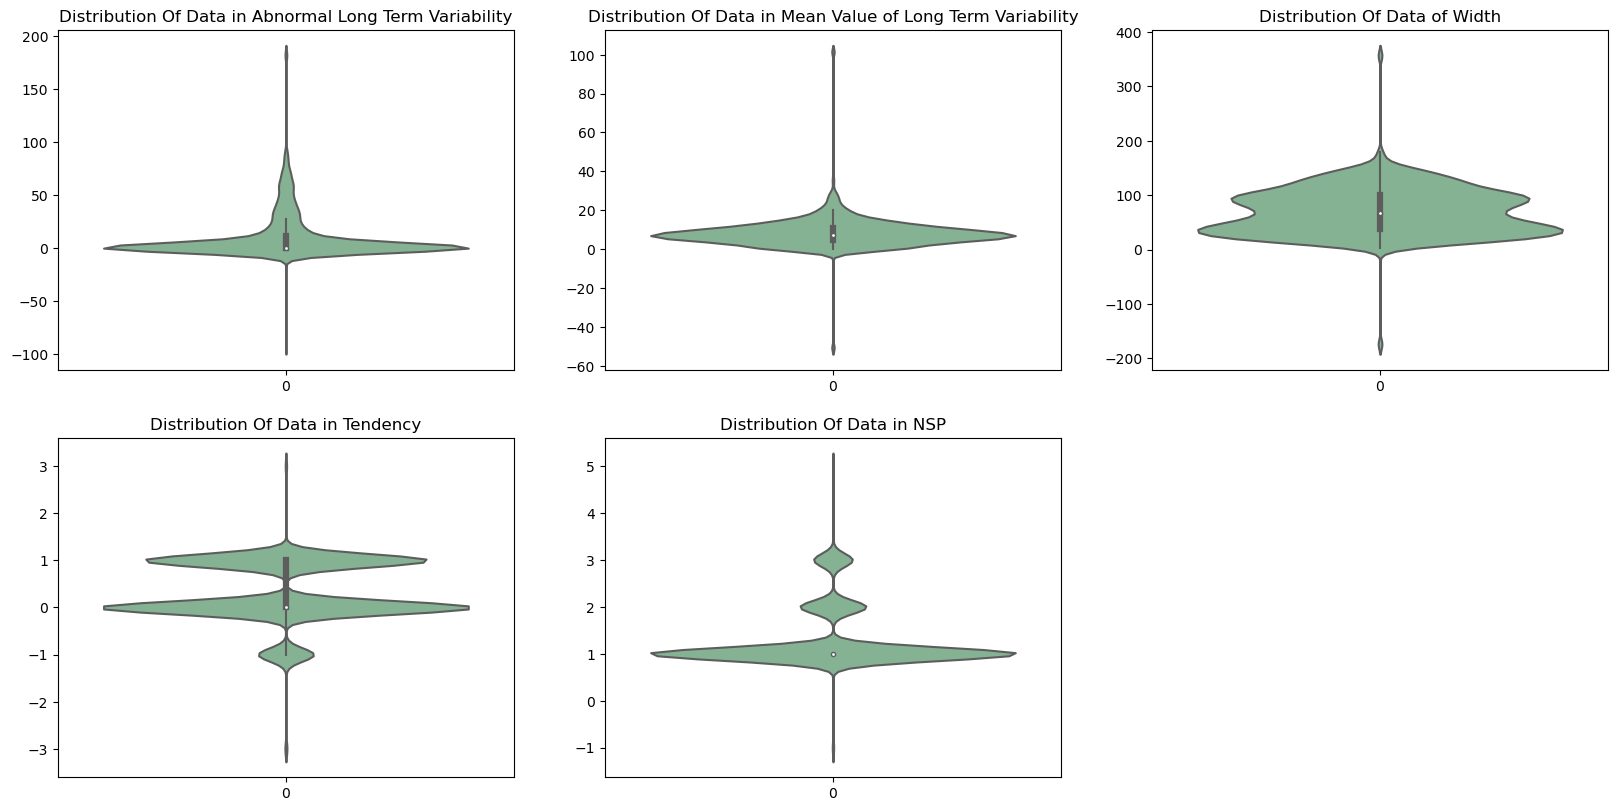

In [25]:
sb.set_palette('crest')
fig = plt.figure(figsize=[20,15])

plt.suptitle("Visualization of Count of Each Parameter")
ax1 = fig.add_subplot(331)
sb.violinplot(df.LB)
plt.title('Distribution Of Data in Baseline Fetal Heart Rate (FHR)')

ax2 = fig.add_subplot(332)
sb.violinplot(df.AC)
plt.title('Distribution Of Data in Acceleration')

ax3 = fig.add_subplot(333)
sb.violinplot(df.FM)
plt.title('Distribution Of Data in Fetal Movements')

ax4 = fig.add_subplot(334)
sb.violinplot(df.UC)
plt.title('Distribution Of Data in Uterine Contractions')

ax5 = fig.add_subplot(335)
sb.violinplot(df.DL)
plt.title('Distribution Of Data in Decelerations Late')

ax6 = fig.add_subplot(336)
sb.violinplot(df.DS)
plt.xticks(rotation=50)
plt.title('Distribution Of Data in Decelerations Short')

ax7 = fig.add_subplot(337)
sb.violinplot(df.DP)
plt.title('Distribution Of Data in Decelerations Prolonged')

ax8 = fig.add_subplot(338)
sb.violinplot(df.ASTV)
plt.title('Distribution Of Data in Abnormal Short Term Variability')

ax9 = fig.add_subplot(339)
sb.violinplot(df.MSTV)
plt.title('Distribution Of Data in Mean Value of Short Term Variability')


fig = plt.figure(figsize=[20,15])
ax1 = fig.add_subplot(331)
sb.violinplot(df.ALTV)
plt.title('Distribution Of Data in Abnormal Long Term Variability')

ax2 = fig.add_subplot(332)
sb.violinplot(df.MLTV)
plt.title('Distribution Of Data in Mean Value of Long Term Variability')

ax3 = fig.add_subplot(333)
sb.violinplot(df.Width)
plt.title('Distribution Of Data of Width')

ax4 = fig.add_subplot(334)
sb.violinplot(df.Tendency)
plt.title('Distribution Of Data in Tendency')

ax5 = fig.add_subplot(335)
sb.violinplot(df.NSP)
plt.title('Distribution Of Data in NSP')

plt.show()

 key insights are , that the person with NSP having normal (1) are most in the all over the Data 
 
 baseline fetal heart rate of 133 are found to be the most out of all the Given parameter

If we Drop all the nan values then 

In [26]:
dt=df.dropna()

In [27]:
dt.describe()

LB           AC           FM           UC           DL  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean    133.343598     0.003202     0.009963     0.004388     0.001892   
std      11.270154     0.004324     0.067870     0.003350     0.003348   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001838     0.000000   
50%     133.000000     0.001631     0.000000     0.004484     0.000000   
75%     140.000000     0.005650     0.002554     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   

                DS           DP         ASTV         MSTV         ALTV  \
count  2105.000000  2105.000000  2105.000000  2105.000000  2105.000000   
mean      0.000003     0.000175    46.996929     1.361006    10.353647   
std       0.000142     0.000840    18.847737     1.173164    21.282102   
min      -0.001353    -0.005348   -63.000000    -6.600000   -91.000000   
25%       0.000000     0.000000    32.000000     0.700000     0.000000   
50%       0.000000     0.000000    49.000000     1.200000     0.000000   
75%       0.000000     0.000000    61.000000     1.700000    11.000000   
max       0.002706     0.010695   162.000000    13.800000   182.000000   

              MLTV        Width     Tendency          NSP  
count  2105.000000  2105.000000  2105.000000  2105.000000  
mean      8.284887    70.429260     0.316371     1.304507  
std       7.772858    42.931822     0.645622     0.644619  
min     -50.700000  -174.000000    -3.000000    -1.025988  
25%       4.600000    37.000000     0.000000     1.000000  
50%       7.400000    67.000000     0.000000     1.000000  
75%      10.900000   100.000000     1.000000     1.000000  
max     101.400000   357.000000     3.000000     5.000000

In [28]:
pp=dt.corr()

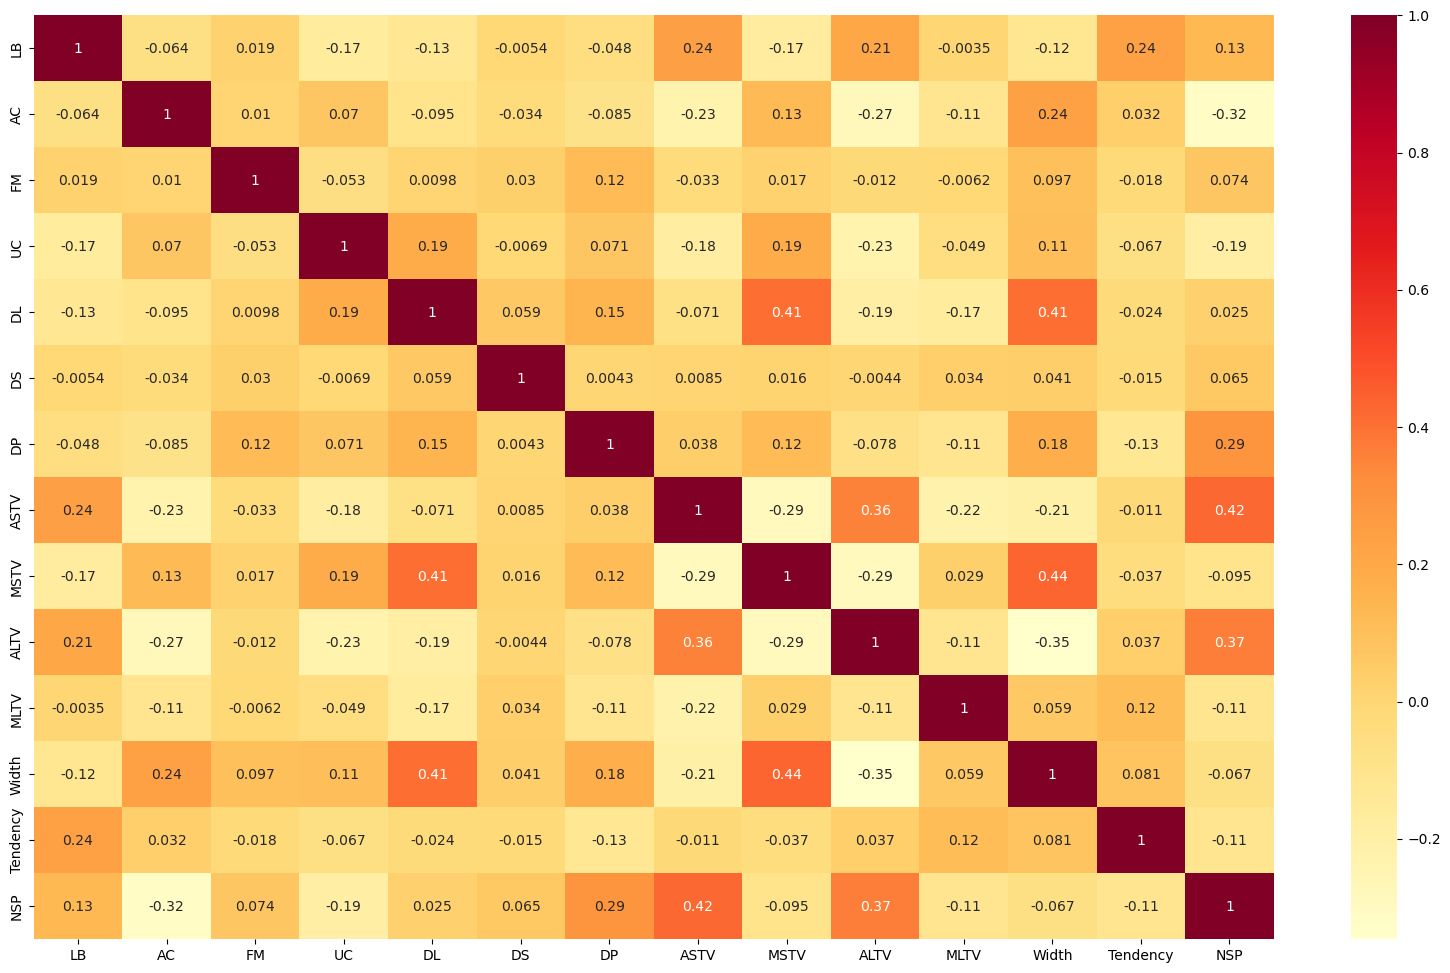

In [29]:
#Heatmap of Correlation of Parameter
plt.figure(figsize=[20,12])
sb.heatmap(pp, annot=True, cmap='YlOrRd')
plt.show()

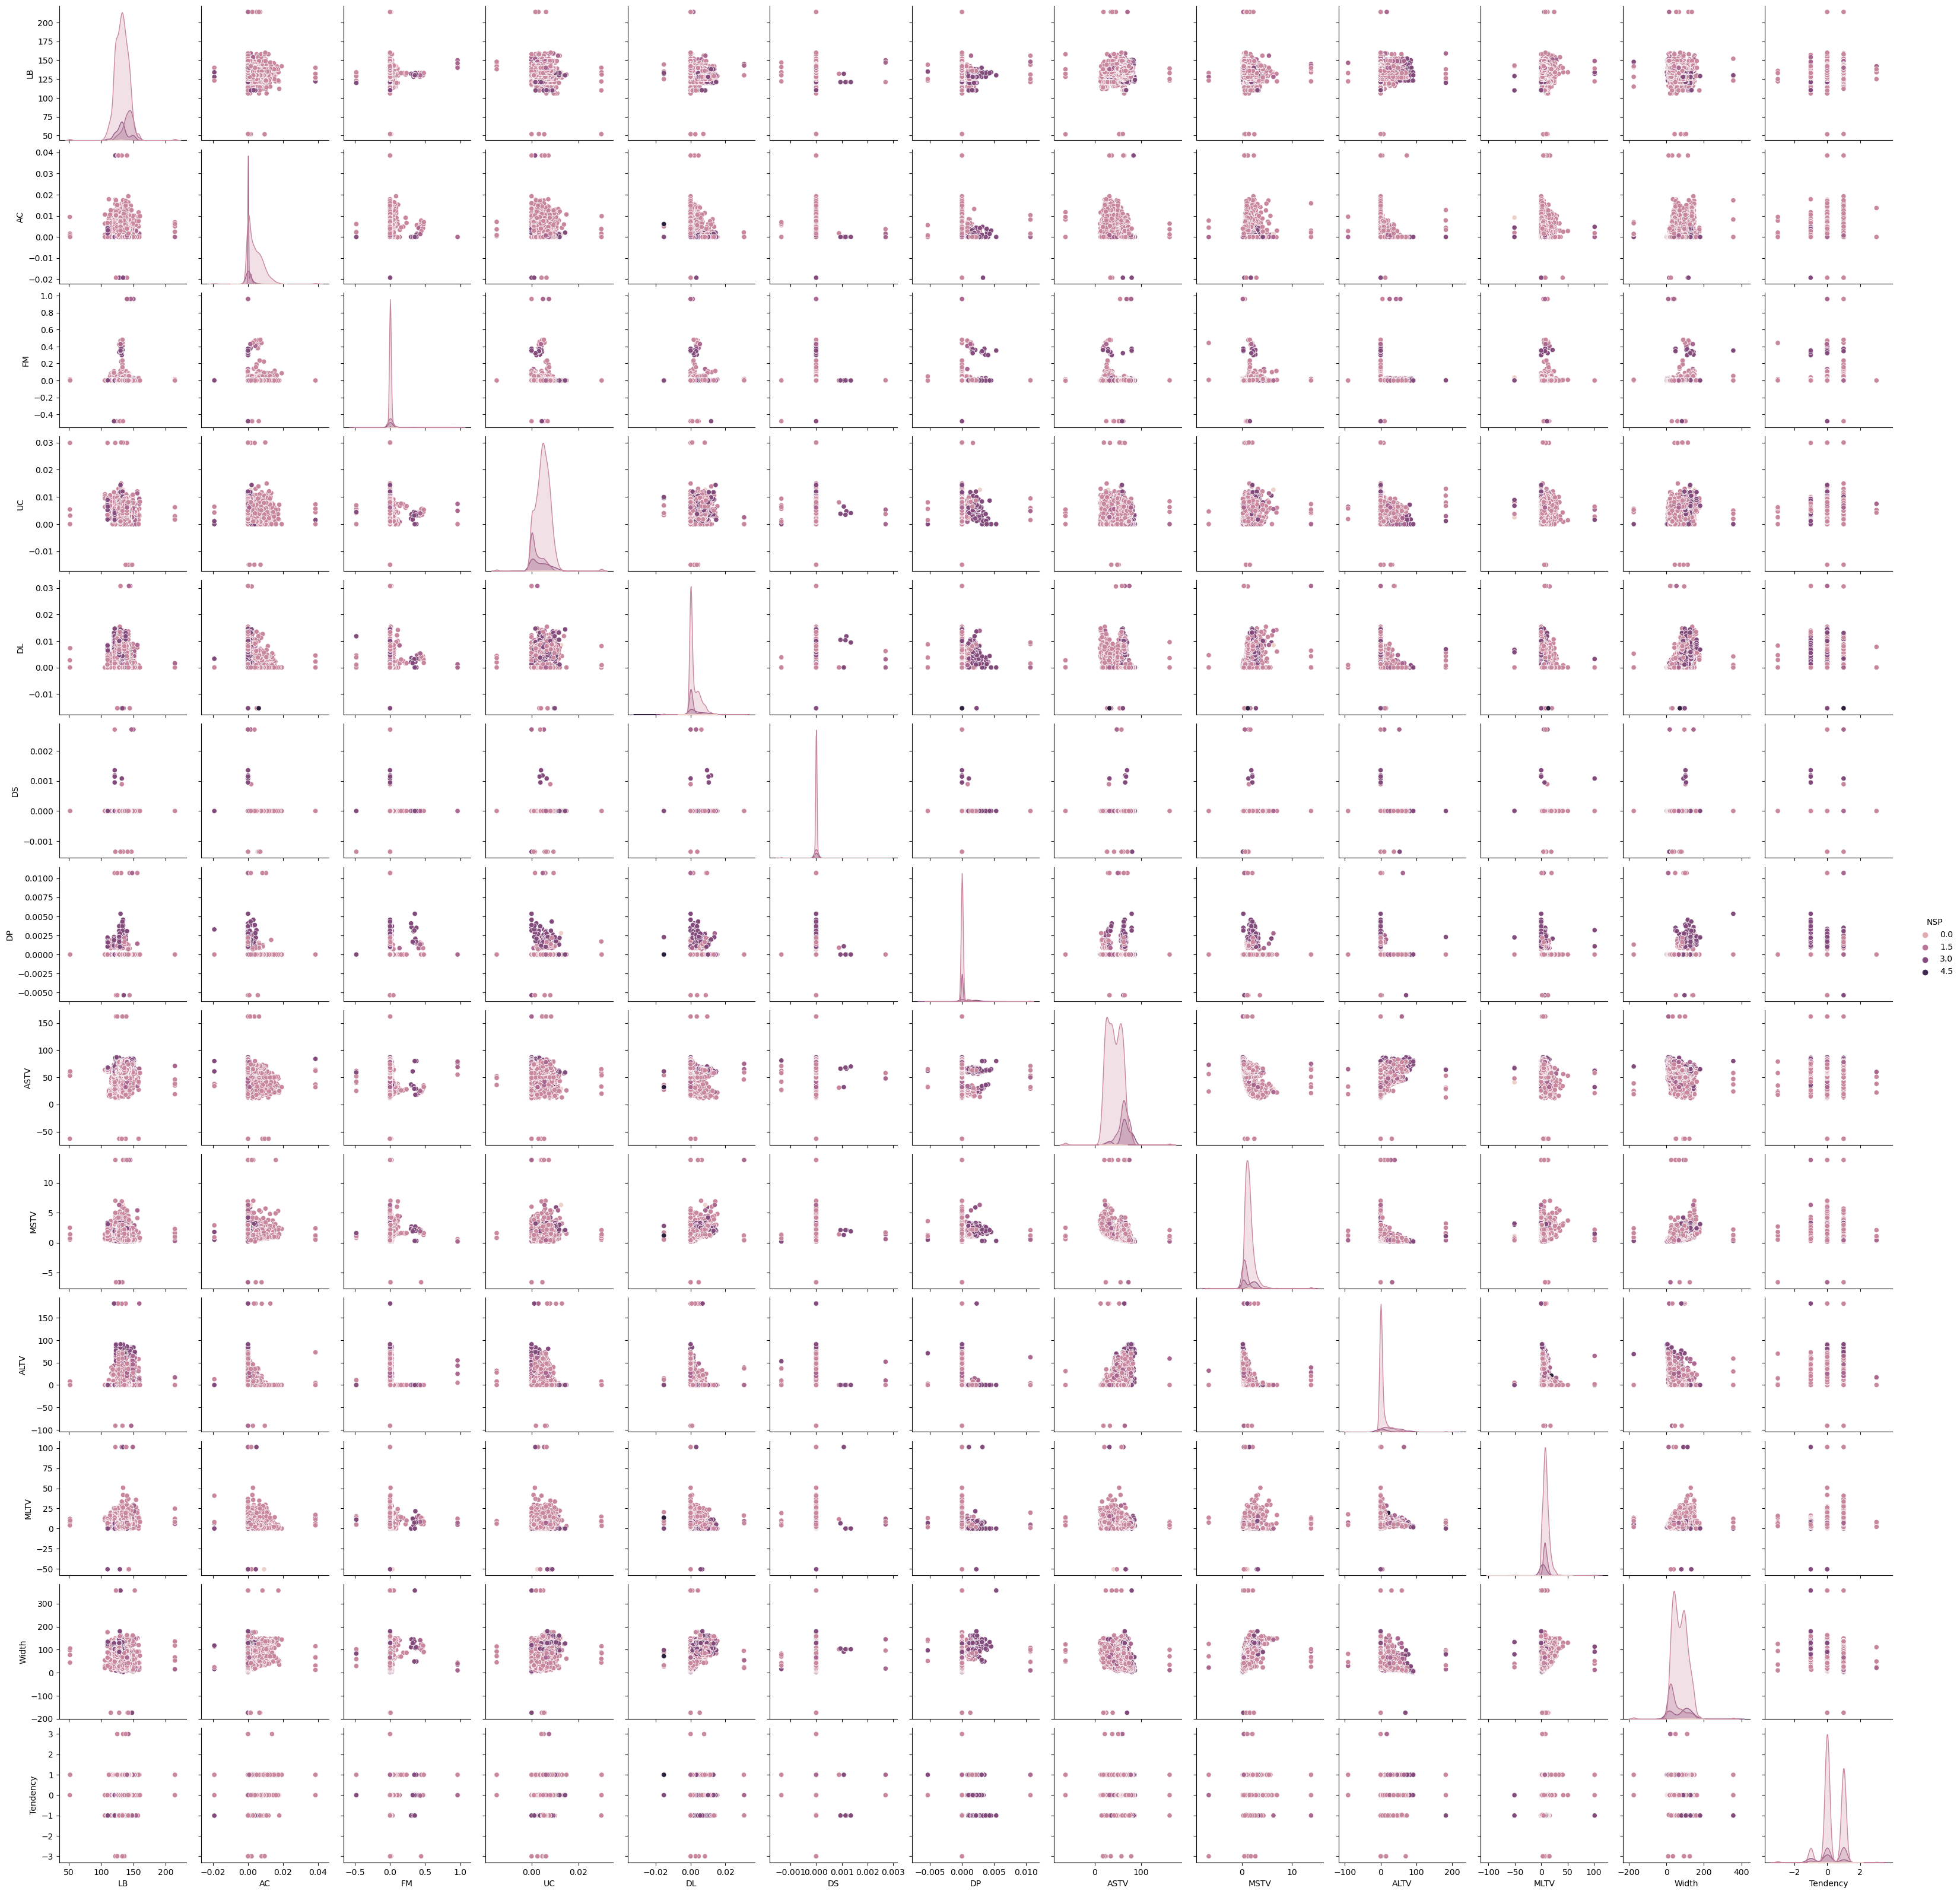

In [30]:
sb.pairplot(dt, hue='NSP')
plt.show()

In [41]:
mean=np.mean(df.NSP)

In [42]:
std=np.std(df.NSP,ddof=1)

In [43]:
n=len(df.NSP)
ds=n-1
ds

2125

In [44]:
t_score=t.ppf(0.995,ds)
t_score

2.578144930760365

In [45]:
margin_error=t_score*(std/np.sqrt(n))
margin_error

0.03604366521887909

In [46]:
confidence_interval=(mean-margin_error,mean+margin_error)
confidence_interval

(1.268463509892083, 1.3405508403298412)